In [1]:
# read in the data -- blah
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
### Will - read data ###
data_1 = pd.read_csv(r'C:\Users\sherm\Documents\Grad School - Classes\MSDS - 7333 - Quantifying the World\Case Study 1\superconduct\train.csv')
### Randy - read data ###
# data_1 = pd.read_csv("train.csv")
### Kati - read data ###
# data_1 = 

print(data_1.shape)
print(data_1.columns)
data_1.head()

(21263, 82)
Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
  

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [3]:
### Will - read data ###
data_2 = pd.read_csv(r'C:\Users\sherm\Documents\Grad School - Classes\MSDS - 7333 - Quantifying the World\Case Study 1\superconduct\unique_m.csv')
### Randy - read data ###
# data_2 = pd.read_csv("unique_m.csv")
### Kati - read data ###
# data_2 = 

print(data_2.shape)
print(data_2.columns)
data_2.head()

(21263, 88)
Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')


H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

In [4]:
print(data_1.isnull().values.any())
print(data_1.isna().values.any())

False
False


In [5]:
print(data_2.isnull().values.any())
print(data_2.isna().values.any())

False
False


In [6]:
data_raw = pd.merge(data_1, data_2, left_index=True, right_index=True)
print(data_raw.shape)
print(data_raw.columns)
data_raw.head()

(21263, 170)
Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass',
       ...
       'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'critical_temp_y',
       'material'],
      dtype='object', length=170)


number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp_y  \
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             29.0   
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             26.0   
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             19.0   
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             22.0   
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             23.0   

                 material  
0         Ba0.2La1.8Cu1O4  
1  Ba0.1La1.9Ag0.1Cu0.9O4  
2         Ba0.1La1.9Cu1O4  
3       Ba0.15La1.85Cu1O4  
4         Ba0.3La1.7Cu1O4  

[5 rows x 170 columns]

In [7]:
data_raw = data_raw.drop(['material'], axis=1)

In [8]:
y_data = pd.DataFrame(data_raw.loc[:,'critical_temp_y'])
y_data

critical_temp_y
0                29.00
1                26.00
2                19.00
3                22.00
4                23.00
...                ...
21258             2.44
21259           122.10
21260             1.98
21261             1.84
21262            12.80

[21263 rows x 1 columns]

In [9]:
x_data = data_raw.loc[:,data_raw.columns != 'critical_temp_y']
x_data = pd.DataFrame(x_data.loc[:,x_data.columns != 'critical_temp_x'])
x_data.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  

[5 rows x 167 columns]

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
x_scaled = scaler.fit_transform(x_data)
x_scaled = pd.DataFrame(x_scaled, columns=x_data.columns)
x_scaled.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0           -0.080058          0.046733             -0.451651   
1            0.614744          0.174269             -0.432071   
2           -0.080058          0.046733             -0.450978   
3           -0.080058          0.046733             -0.451314   
4           -0.080058          0.046733             -0.452324   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          -0.158850              -0.611819             0.044358   
1           0.059368              -0.604180             0.777430   
2          -0.158850              -0.611658             0.044358   
3          -0.158850              -0.611739             0.044358   
4          -0.158850              -0.611980             0.044358   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                -0.003707           0.133725              -0.053039   
1                -0.015267           0.133725               0.108900   
2                -0.218984           0.133725               0.093294   
3                -0.103615           0.133725               0.020128   
4                 0.162775           0.133725              -0.199372   

   std_atomic_mass  ...        Ir        Pt        Au        Hg        Tl  \
0         0.378186  ... -0.071179 -0.110785 -0.028601 -0.178115 -0.176113   
1         0.134901  ... -0.071179 -0.110785 -0.028601 -0.178115 -0.176113   
2         0.378186  ... -0.071179 -0.110785 -0.028601 -0.178115 -0.176113   
3         0.378186  ... -0.071179 -0.110785 -0.028601 -0.178115 -0.176113   
4         0.378186  ... -0.071179 -0.110785 -0.028601 -0.178115 -0.176113   

         Pb        Bi   Po   At   Rn  
0 -0.154764 -0.306457  0.0  0.0  0.0  
1 -0.154764 -0.306457  0.0  0.0  0.0  
2 -0.154764 -0.306457  0.0  0.0  0.0  
3 -0.154764 -0.306457  0.0  0.0  0.0  
4 -0.154764 -0.306457  0.0  0.0  0.0  

[5 rows x 167 columns]

In [12]:
x_scaled.describe()
# mean should be close to 0
# std should be close to 1

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        2.126300e+04      2.126300e+04          2.126300e+04   
mean        -2.315084e-14     -1.554934e-16         -4.762947e-16   
std          1.000024e+00      1.000024e+00          1.000024e+00   
min         -2.164461e+00     -2.716578e+00         -1.987627e+00   
25%         -7.748586e-01     -5.088171e-01         -6.224159e-01   
50%         -8.005750e-02     -8.878888e-02         -3.670313e-01   
75%          6.147436e-01      4.329042e-01          3.916207e-01   
max          3.393948e+00      4.091643e+00          4.060724e+00   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       2.126300e+04           2.126300e+04         2.126300e+04   
mean       -1.972493e-15           1.698125e-15        -7.291089e-16   
std         1.000024e+00           1.000024e+00         1.000024e+00   
min        -2.126040e+00          -1.543759e+00        -3.194131e+00   
25%        -4.269932e-01          -6.354924e-01        -5.451352e-01   
50%        -1.588497e-01          -5.080880e-01         9.298644e-02   
75%         2.199857e-01           3.976327e-01         7.643533e-01   
max         4.437377e+00           4.104765e+00         2.242095e+00   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             2.126300e+04       2.126300e+04           2.126300e+04   
mean             -2.588337e-15       1.987268e-14           4.419563e-16   
std               1.000024e+00       1.000024e+00           1.000024e+00   
min              -2.650340e+00      -2.116247e+00          -1.232064e+00   
25%              -7.187610e-01      -6.789554e-01          -6.081867e-01   
50%               2.065198e-01       1.337252e-01          -2.443424e-01   
75%               7.362335e-01       7.051285e-01           1.902943e-01   
max               2.227924e+00       1.690987e+00           6.391662e+00   

       std_atomic_mass  ...            Ir            Pt            Au  \
count     2.126300e+04  ...  2.126300e+04  2.126300e+04  2.126300e+04   
mean      2.218916e-15  ... -1.113766e-14 -4.271141e-14  6.930127e-15   
std       1.000024e+00  ...  1.000024e+00  1.000024e+00  1.000024e+00   
min      -2.215722e+00  ... -7.117902e-02 -1.107846e-01 -2.860129e-02   
25%      -5.740728e-01  ... -7.117902e-02 -1.107846e-01 -2.860129e-02   
50%       3.651651e-02  ... -7.117902e-02 -1.107846e-01 -2.860129e-02   
75%       7.452433e-01  ... -7.117902e-02 -1.107846e-01 -2.860129e-02   
max       2.826450e+00  ...  5.196163e+01  1.872768e+01  8.911303e+01   

                 Hg            Tl            Pb            Bi       Po  \
count  2.126300e+04  2.126300e+04  2.126300e+04  2.126300e+04  21263.0   
mean   2.232941e-14 -1.512393e-14  9.447694e-15 -1.272799e-14      0.0   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00      0.0   
min   -1.781149e-01 -1.761128e-01 -1.547640e-01 -3.064574e-01      0.0   
25%   -1.781149e-01 -1.761128e-01 -1.547640e-01 -3.064574e-01      0.0   
50%   -1.781149e-01 -1.761128e-01 -1.547640e-01 -3.064574e-01      0.0   
75%   -1.781149e-01 -1.761128e-01 -1.547640e-01 -3.064574e-01      0.0   
max    3.868672e+01  2.553166e+01  6.909769e+01  2.103787e+01      0.0   

            At       Rn  
count  21263.0  21263.0  
mean       0.0      0.0  
std        0.0      0.0  
min        0.0      0.0  
25%        0.0      0.0  
50%        0.0      0.0  
75%        0.0      0.0  
max        0.0      0.0  

[8 rows x 167 columns]

### train test split (x_scaled)

In [13]:
xs_train, xs_test, ys_train, ys_test = train_test_split(x_scaled, y_data, test_size=0.1, random_state=10)

### train test split (before scale)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=10)

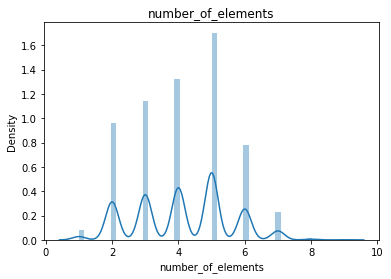

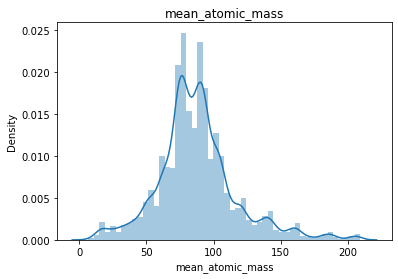

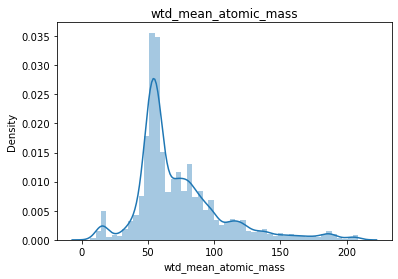

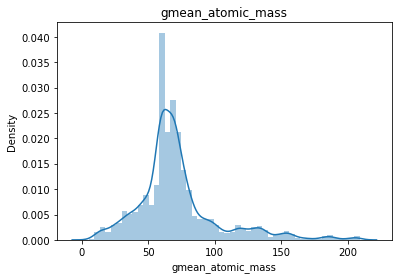

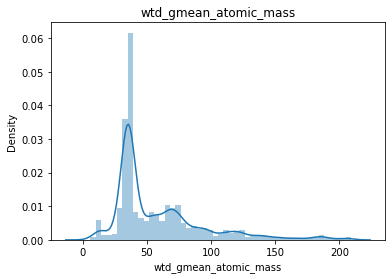

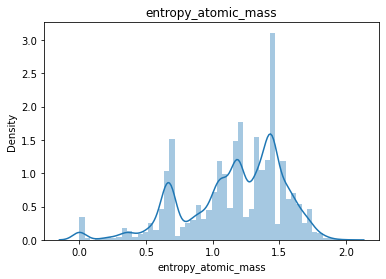

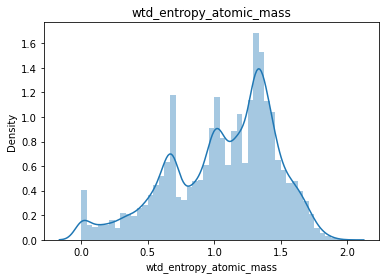

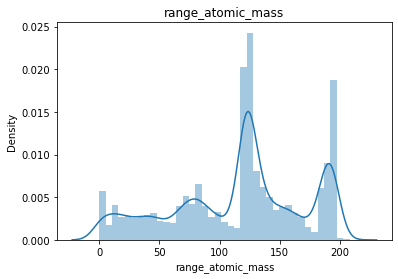

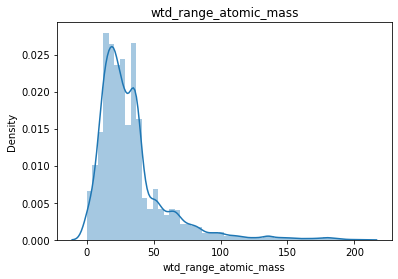

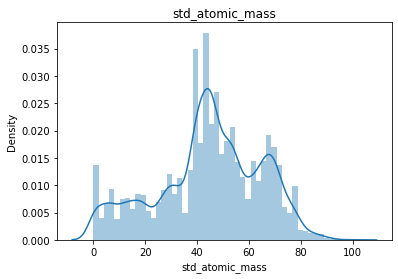

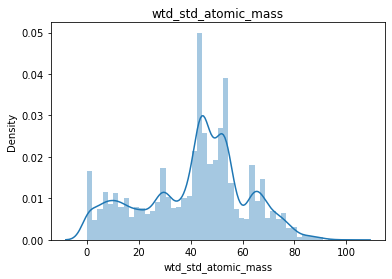

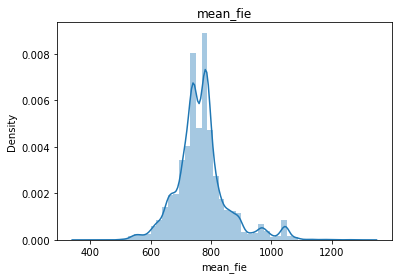

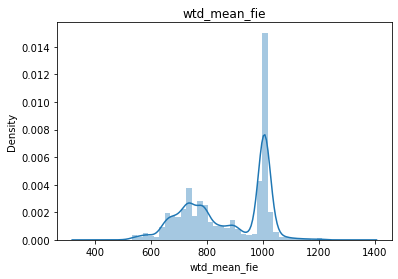

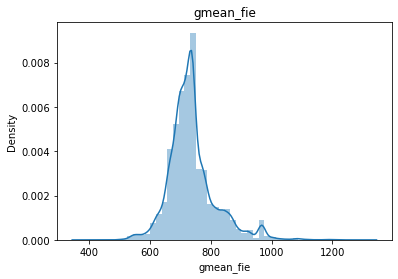

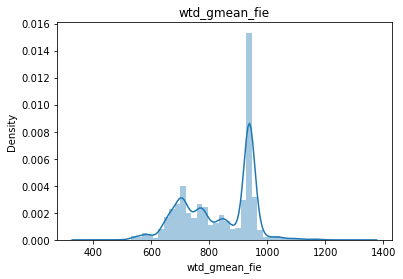

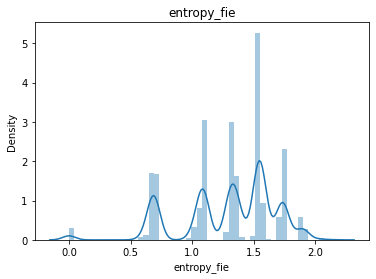

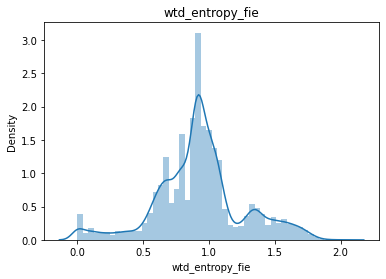

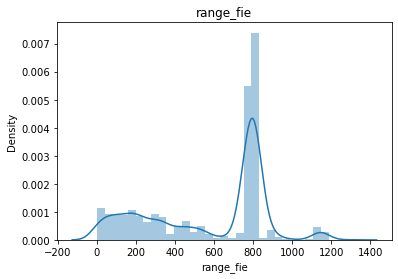

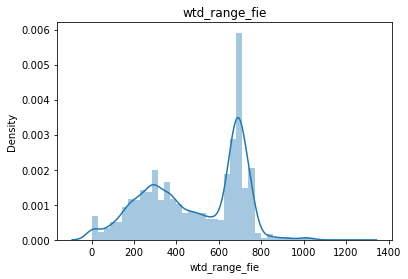

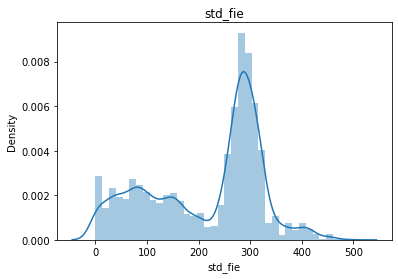

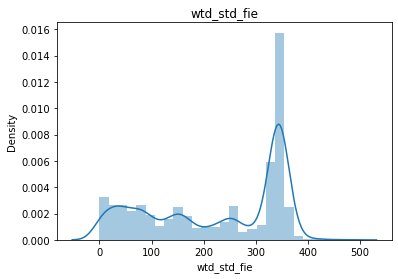

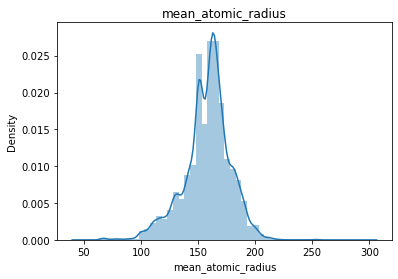

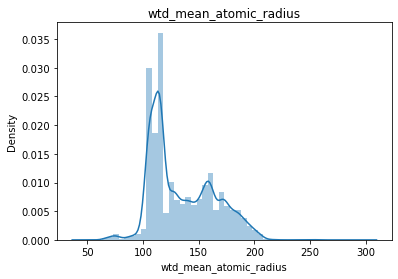

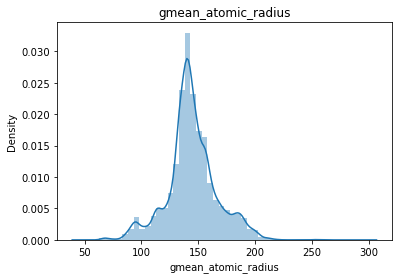

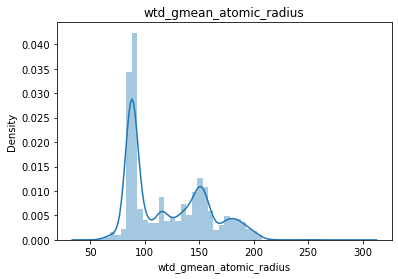

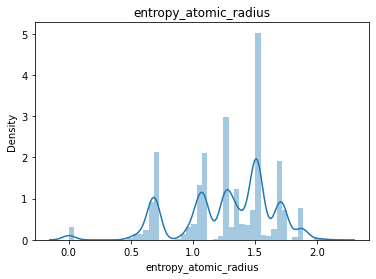

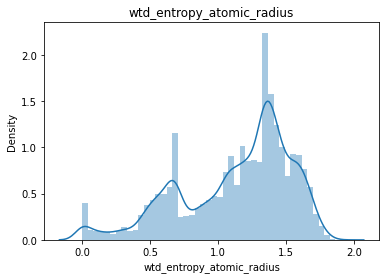

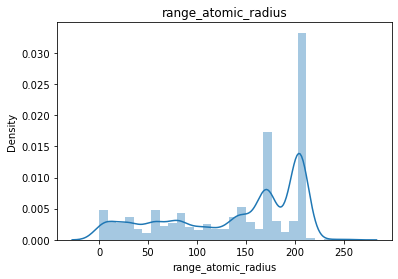

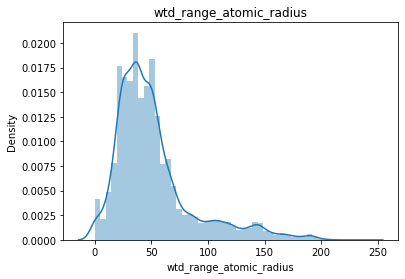

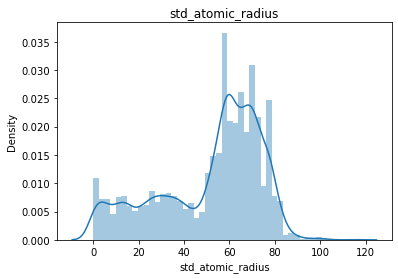

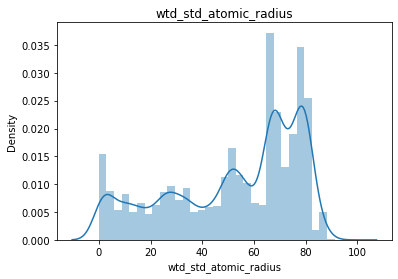

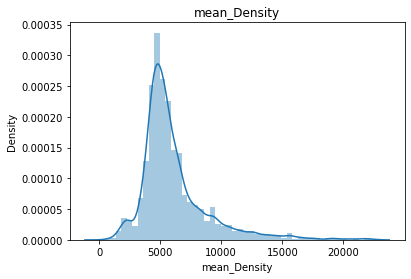

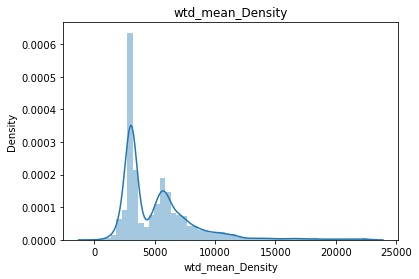

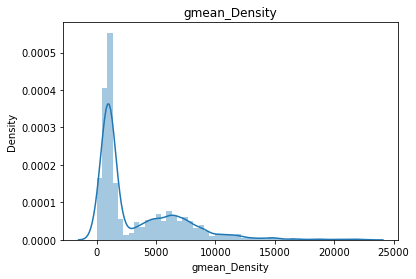

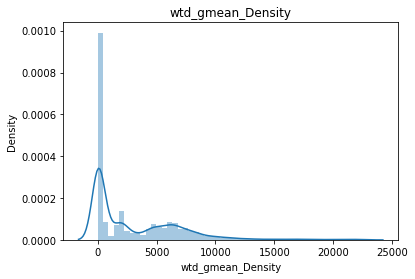

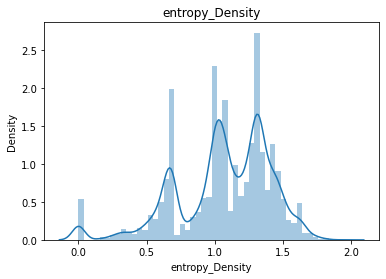

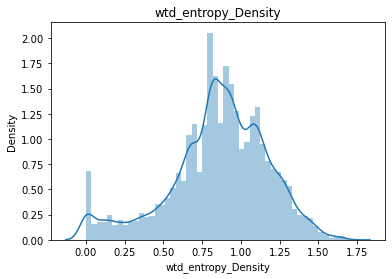

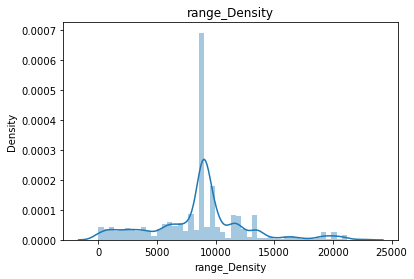

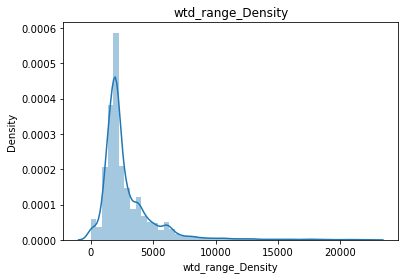

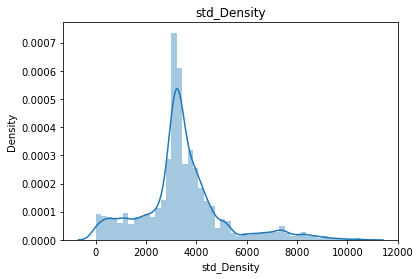

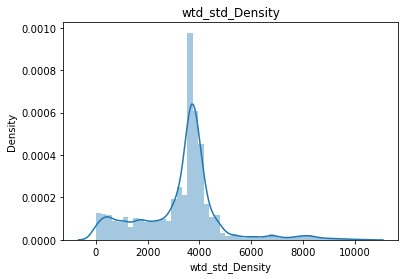

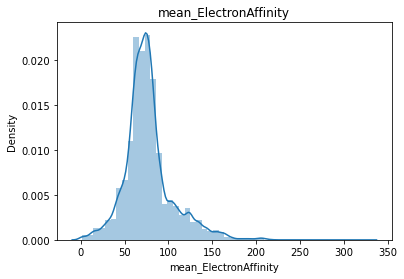

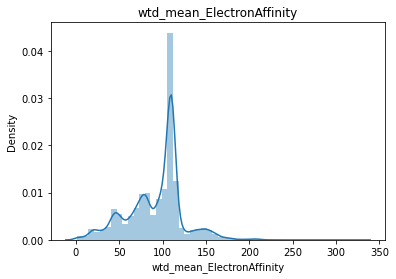

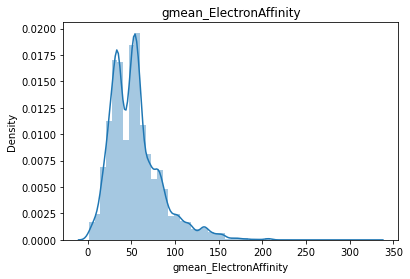

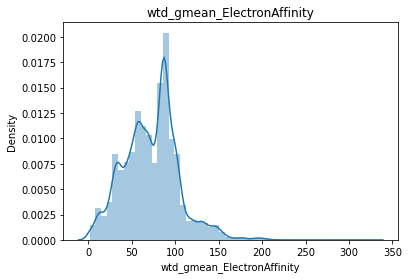

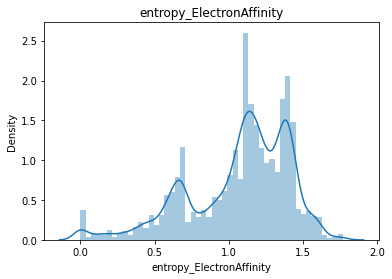

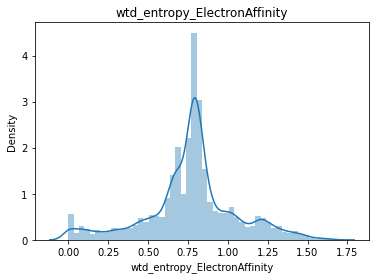

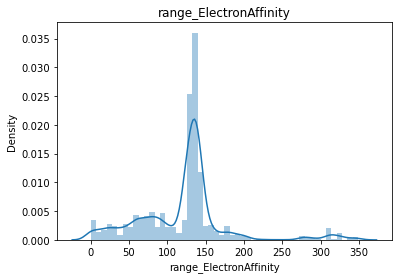

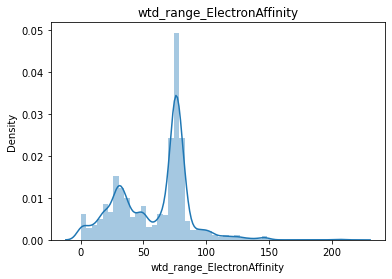

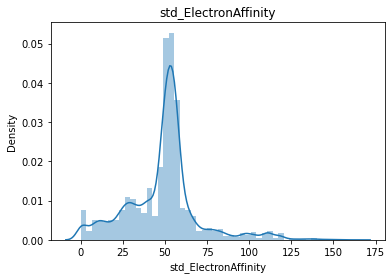

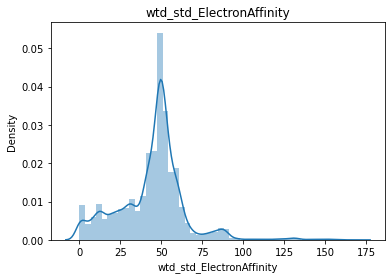

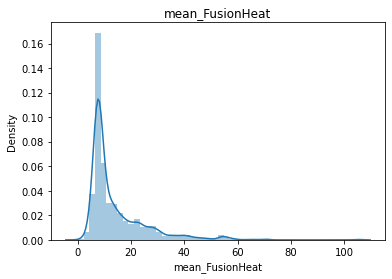

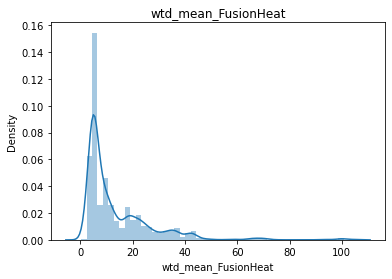

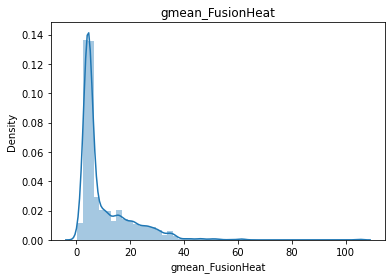

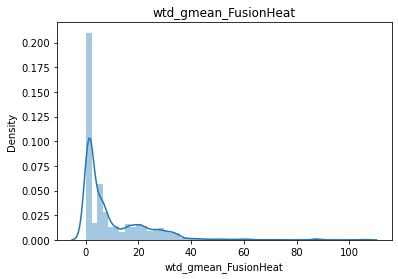

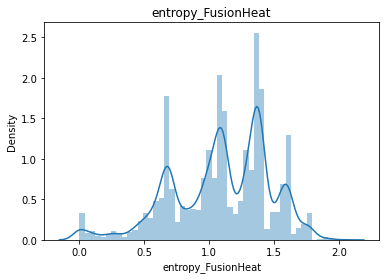

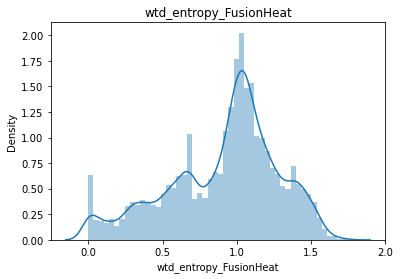

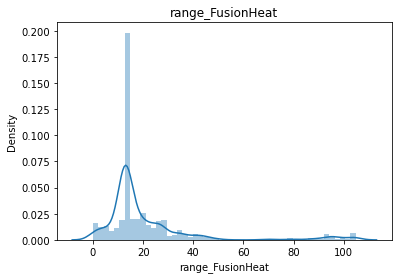

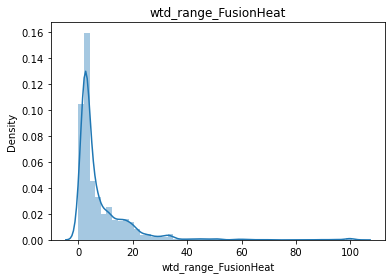

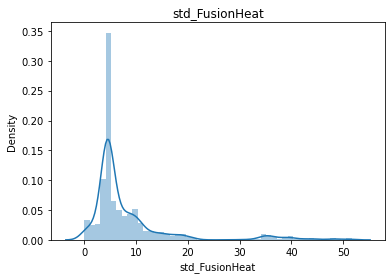

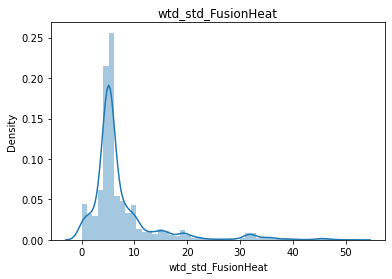

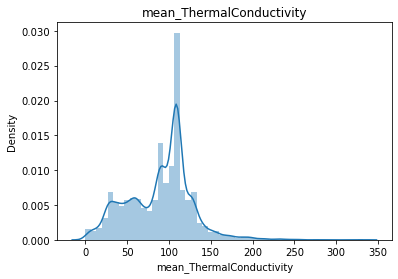

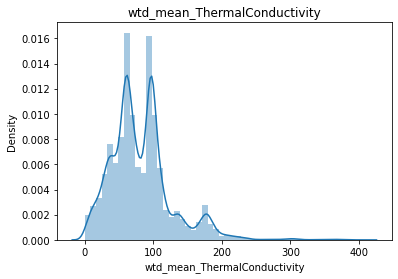

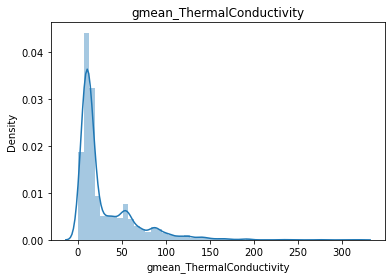

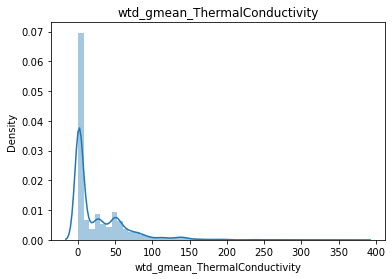

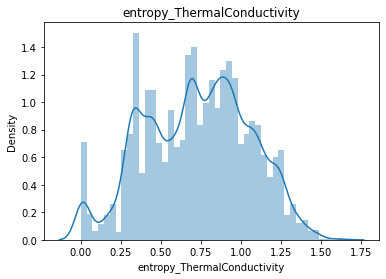

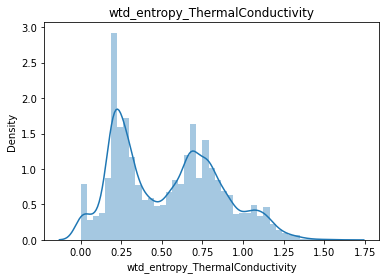

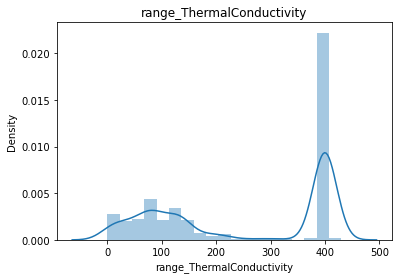

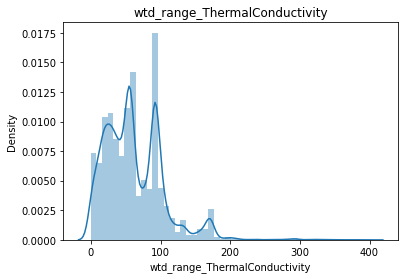

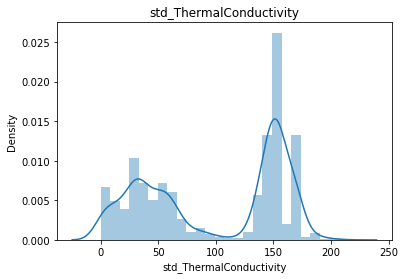

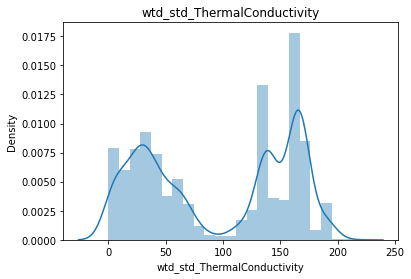

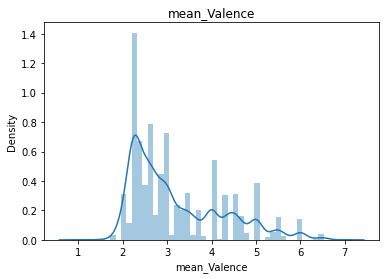

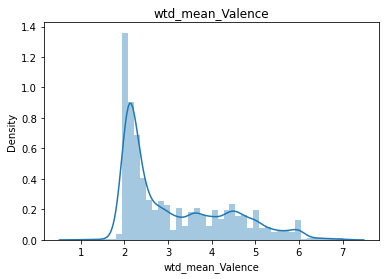

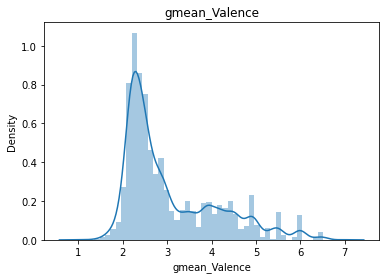

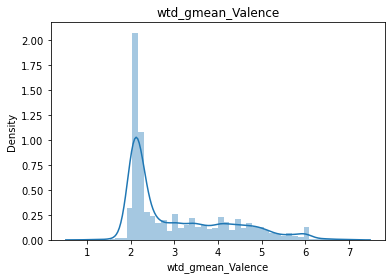

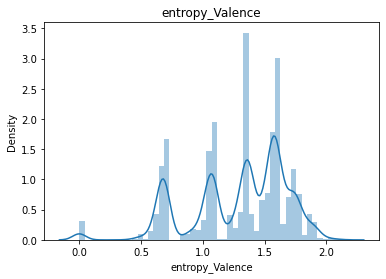

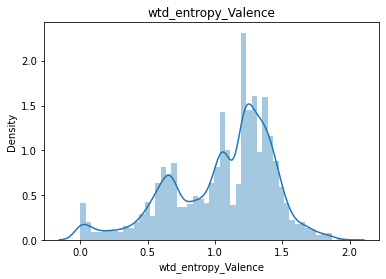

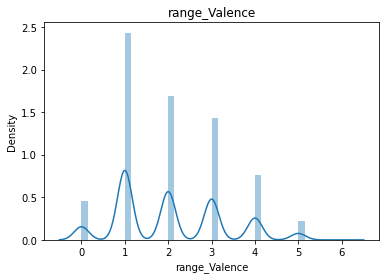

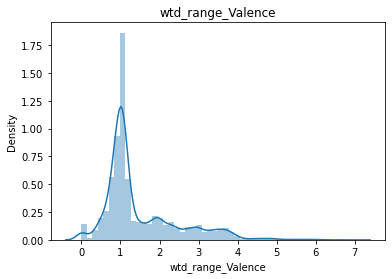

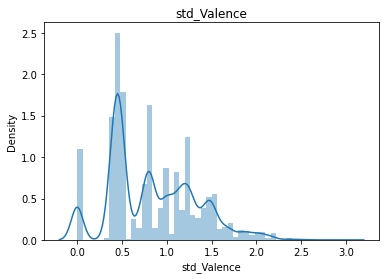

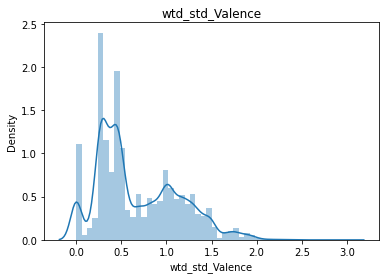

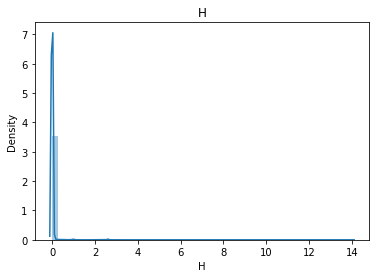

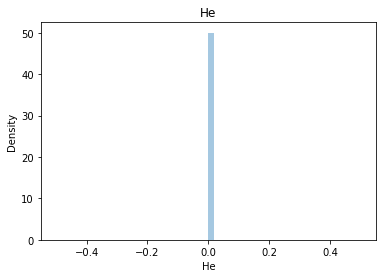

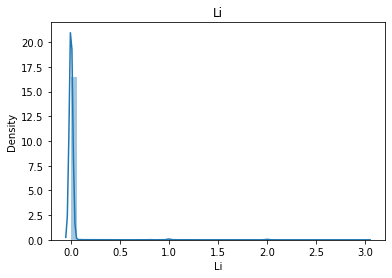

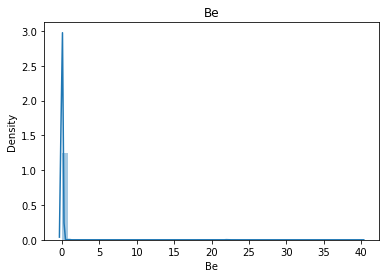

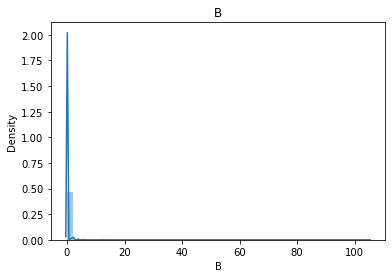

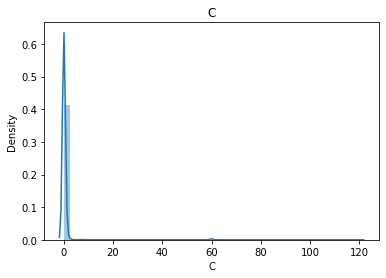

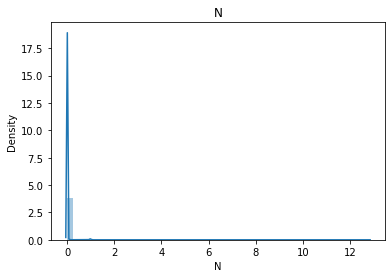

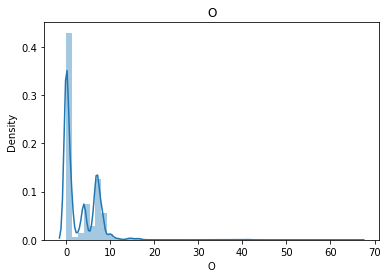

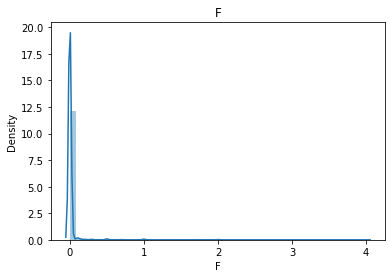

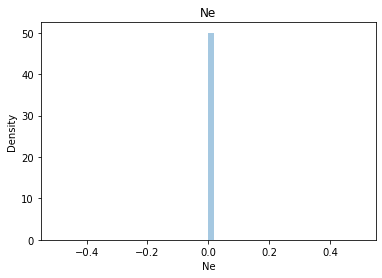

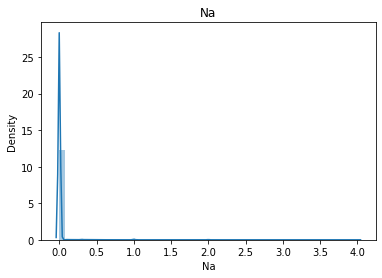

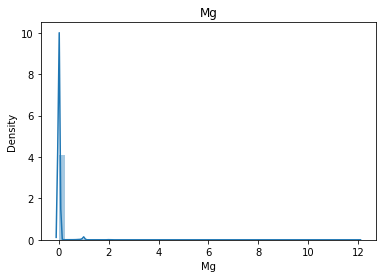

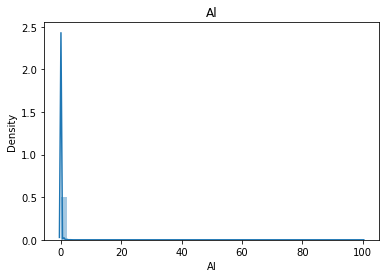

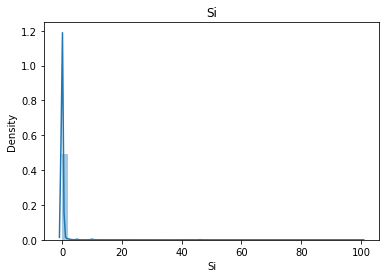

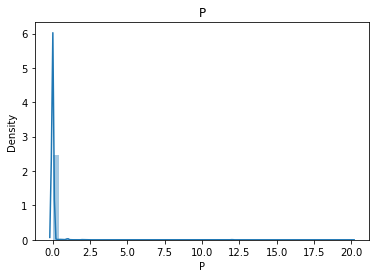

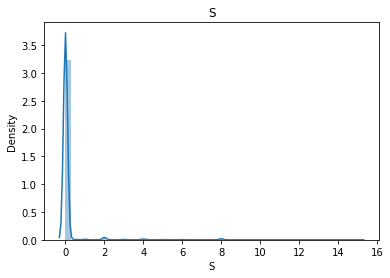

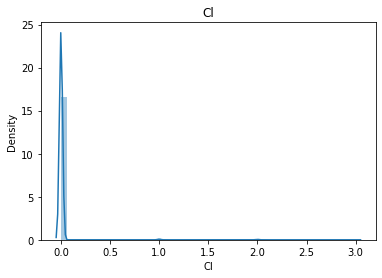

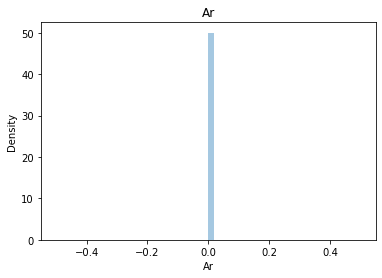

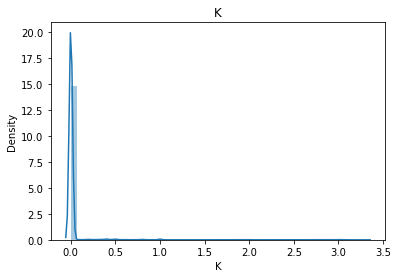

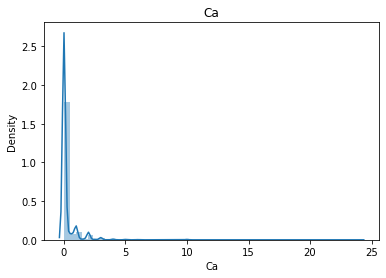

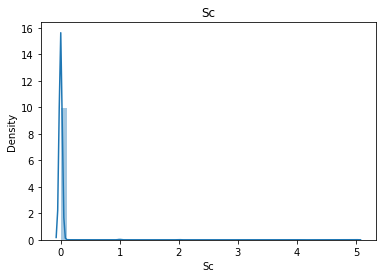

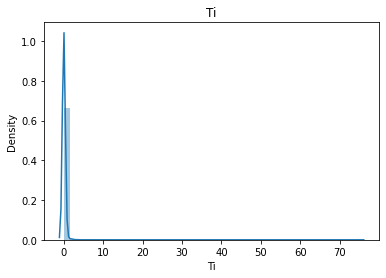

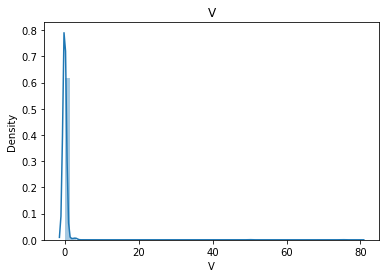

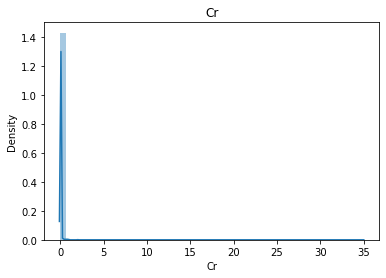

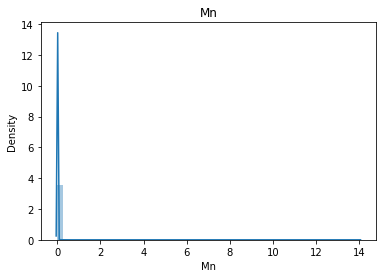

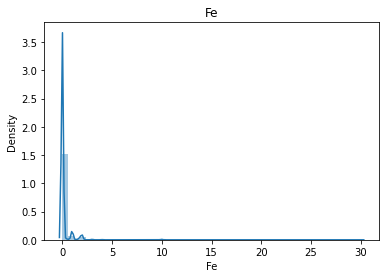

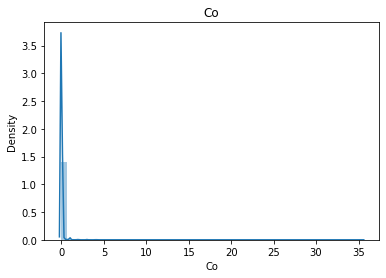

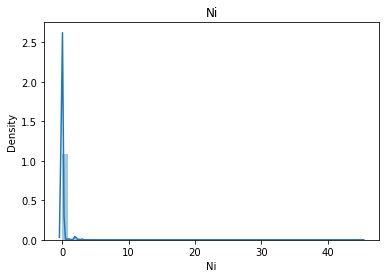

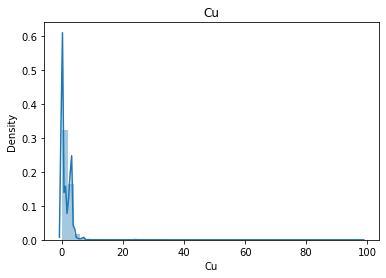

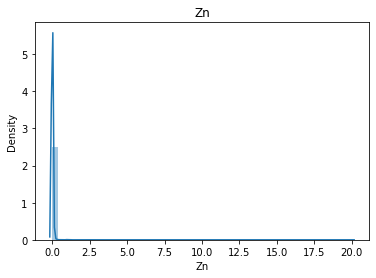

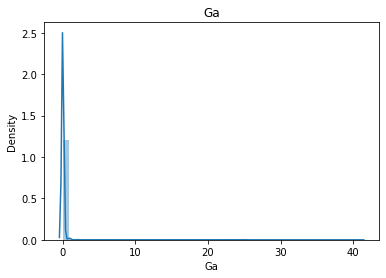

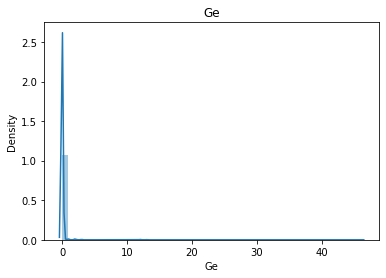

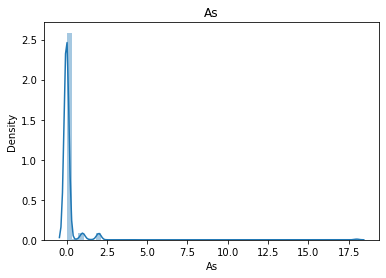

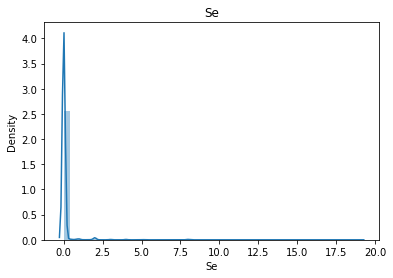

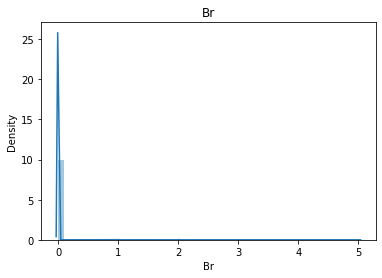

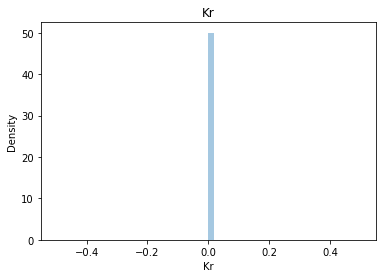

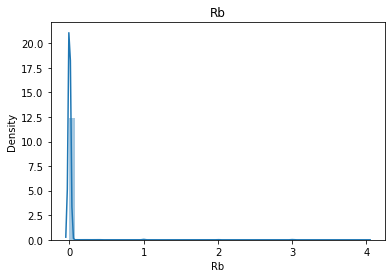

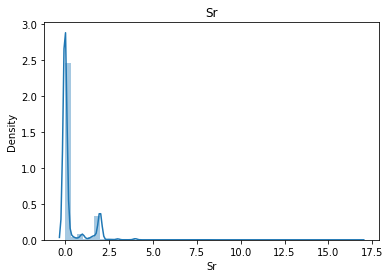

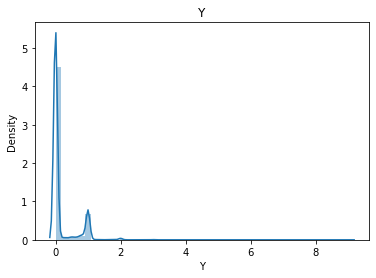

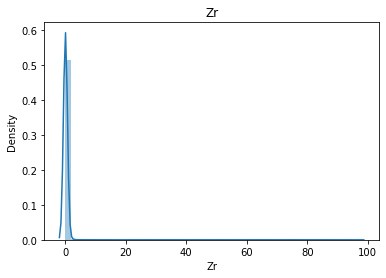

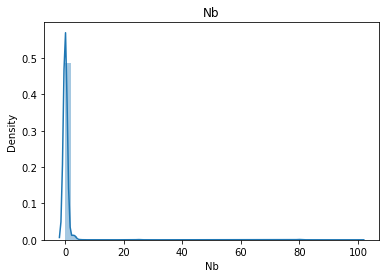

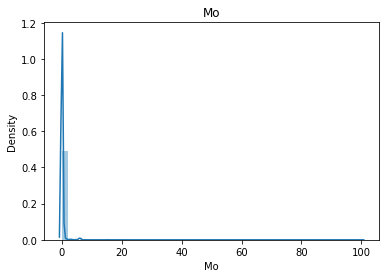

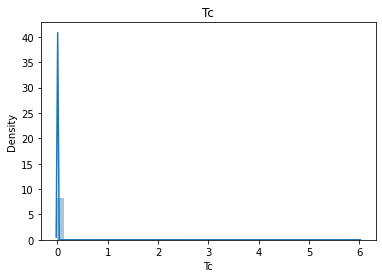

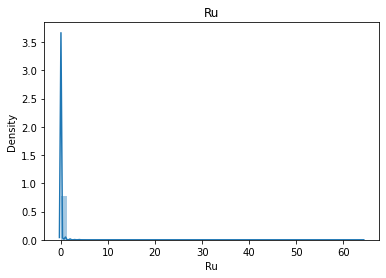

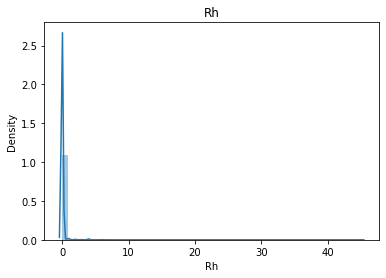

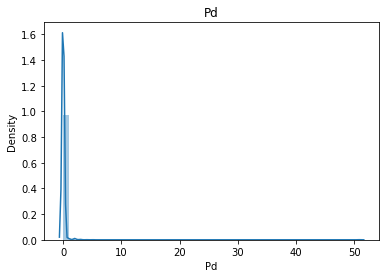

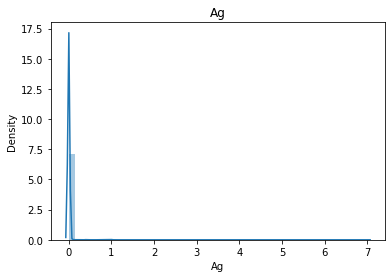

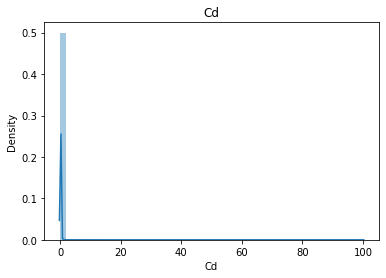

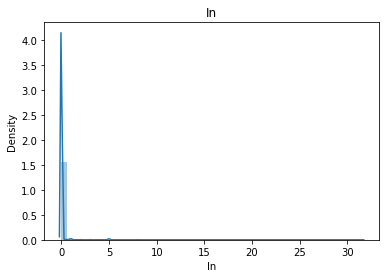

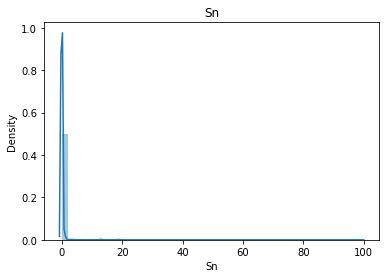

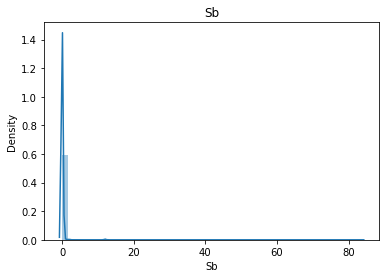

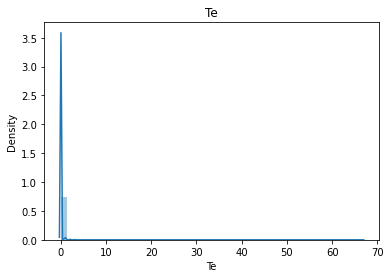

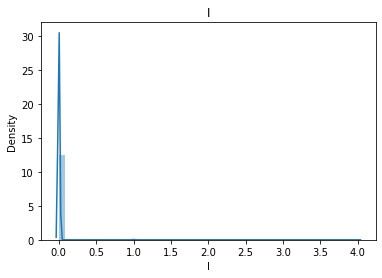

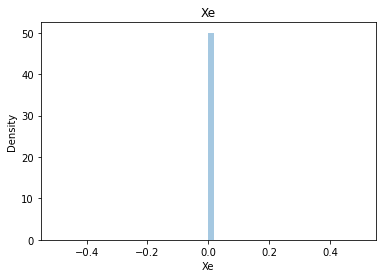

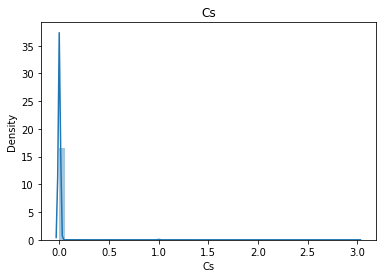

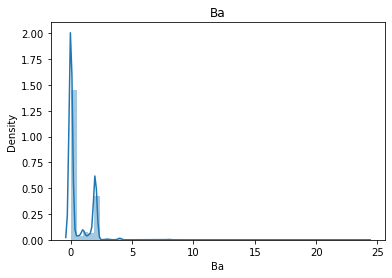

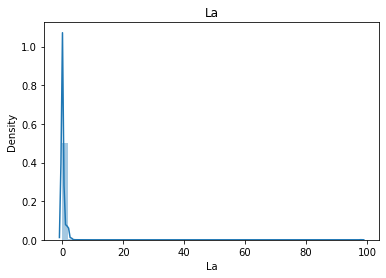

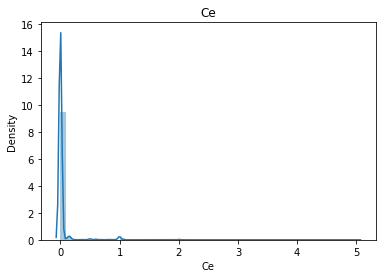

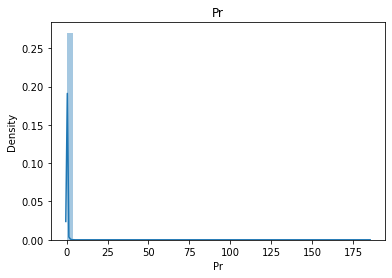

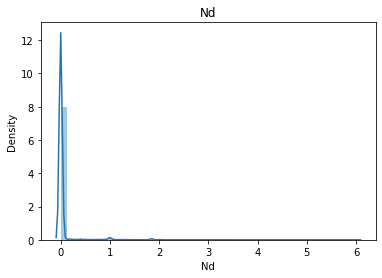

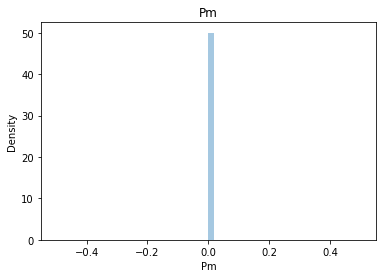

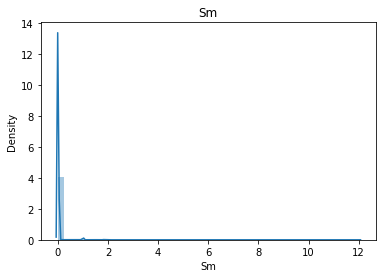

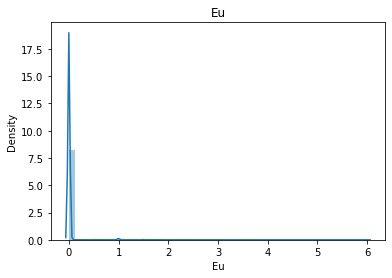

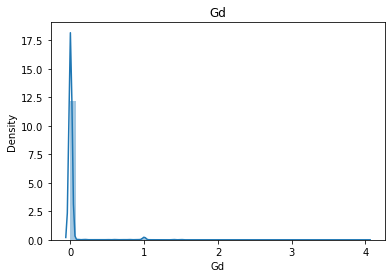

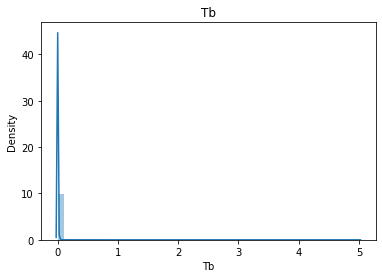

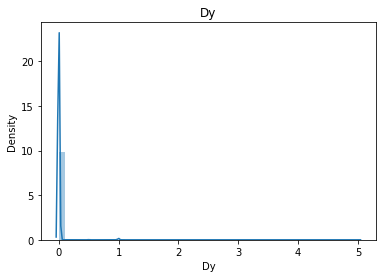

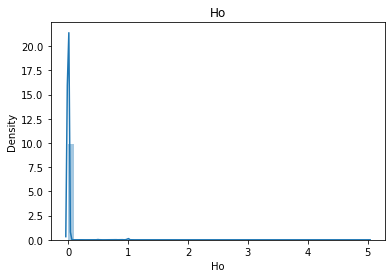

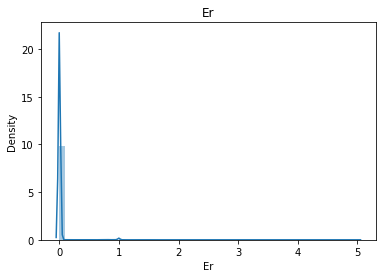

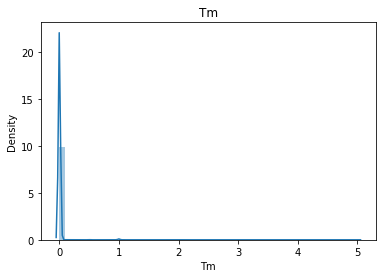

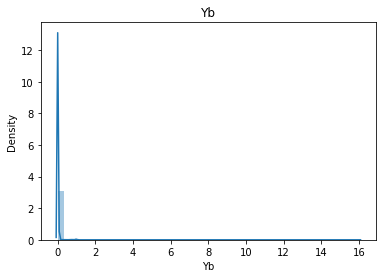

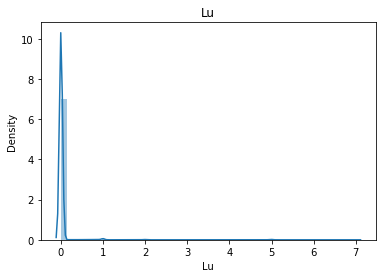

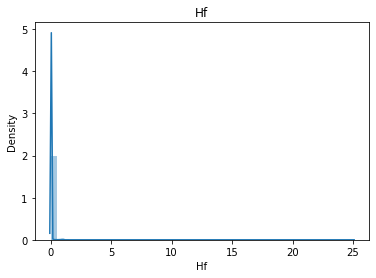

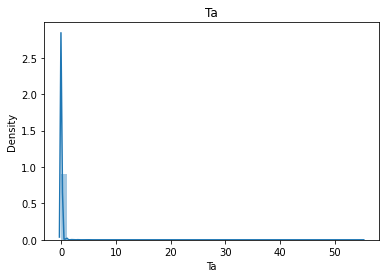

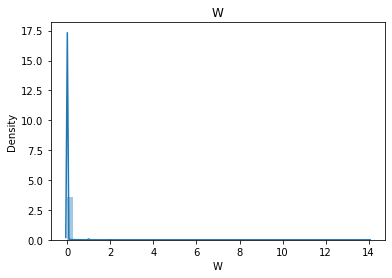

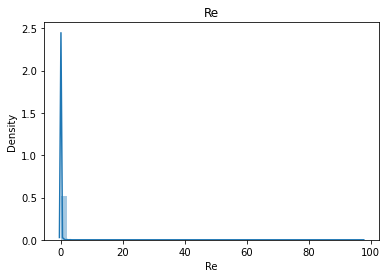

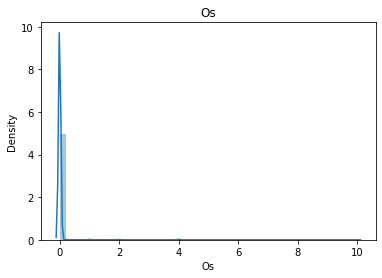

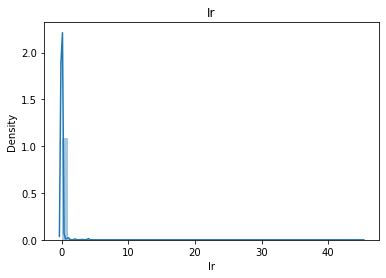

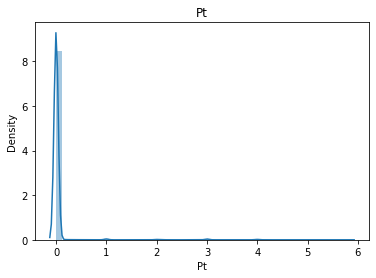

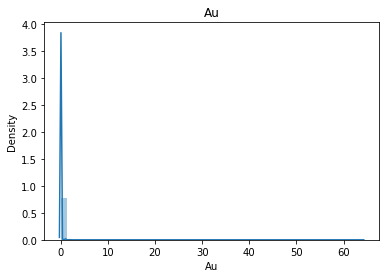

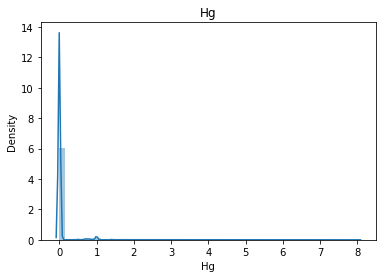

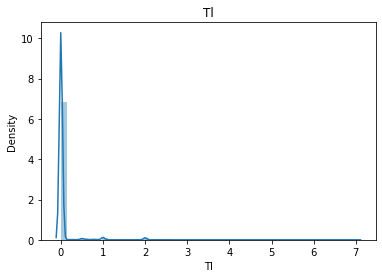

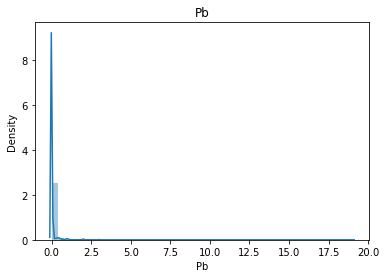

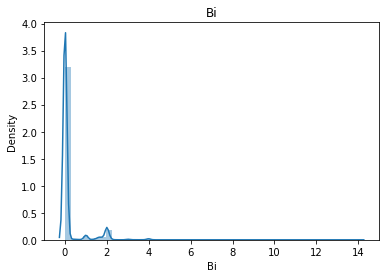

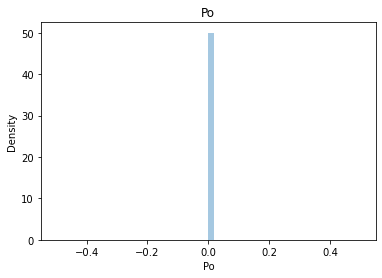

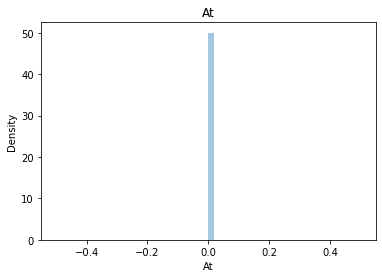

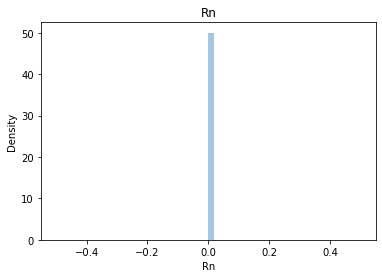

In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 14em; }</style>"))
import warnings
warnings.filterwarnings('ignore')

for i in x_data.columns:
    sns.distplot(x_data.loc[:,i]).set(title=i)
    plt.show()

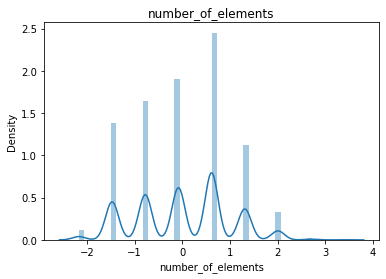

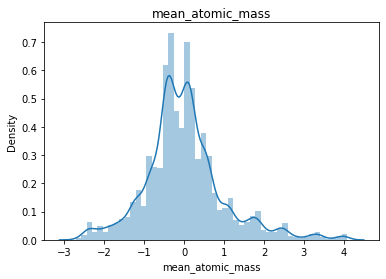

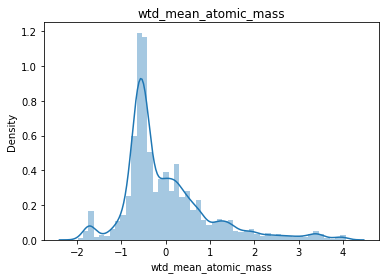

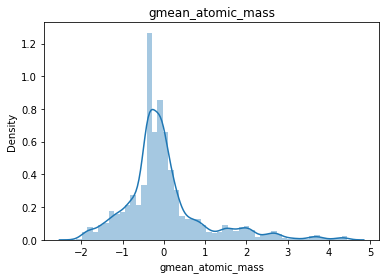

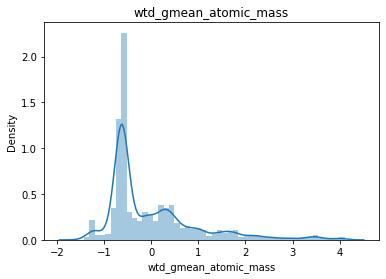

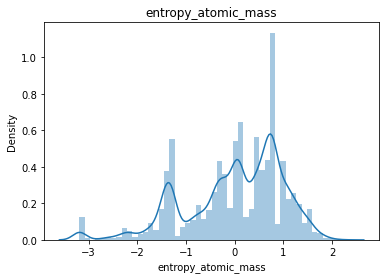

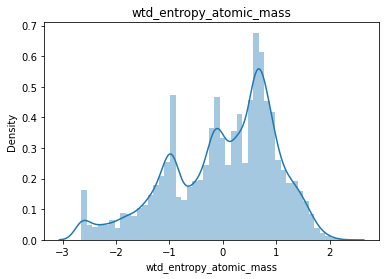

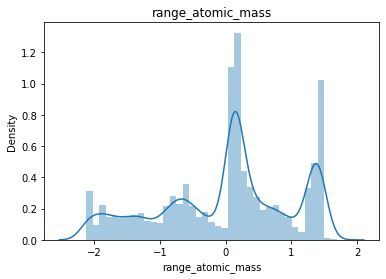

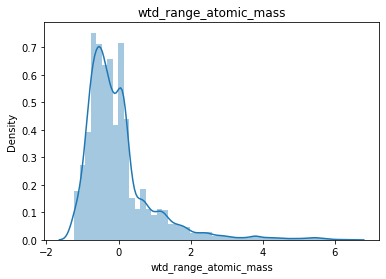

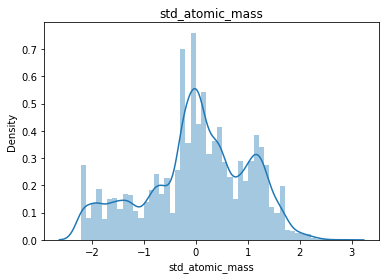

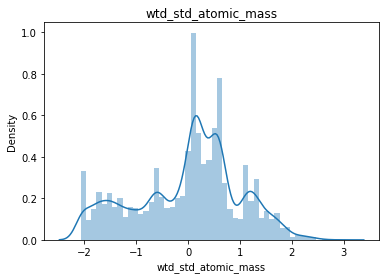

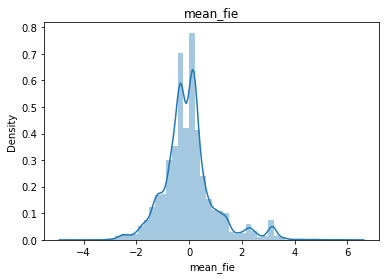

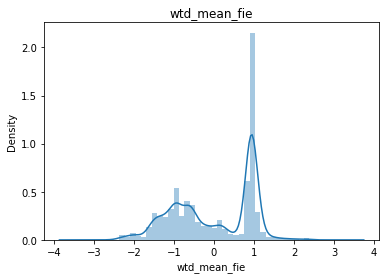

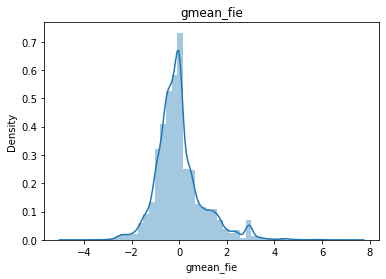

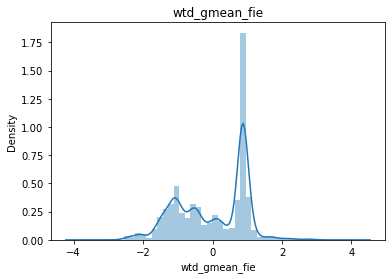

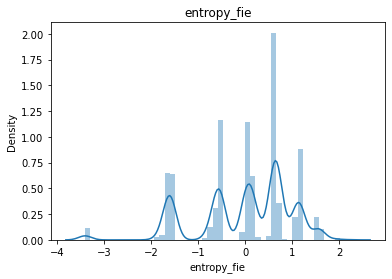

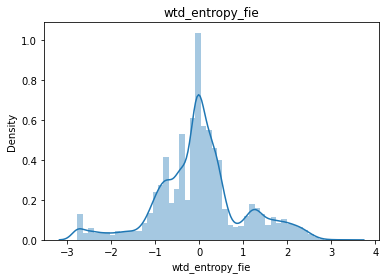

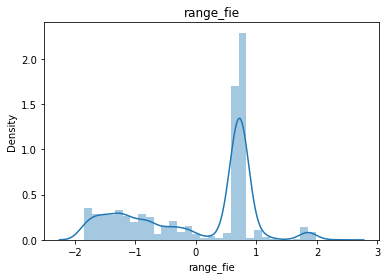

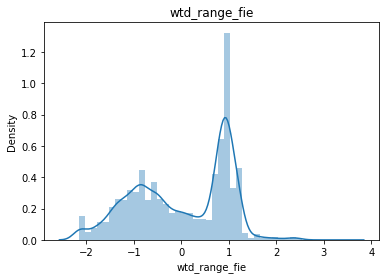

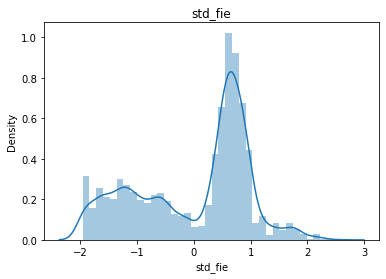

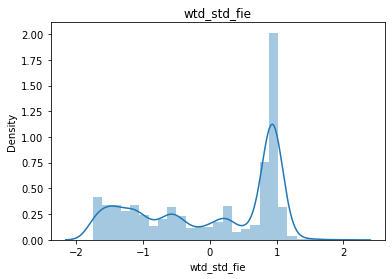

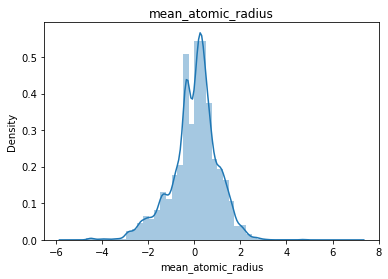

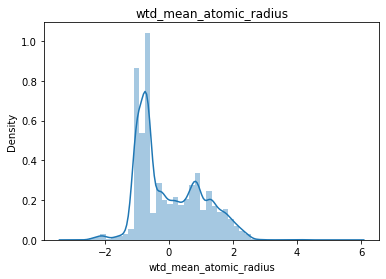

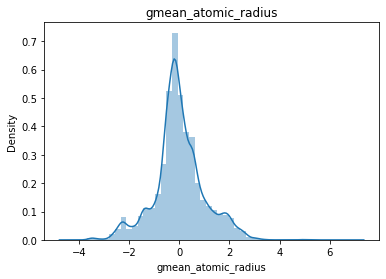

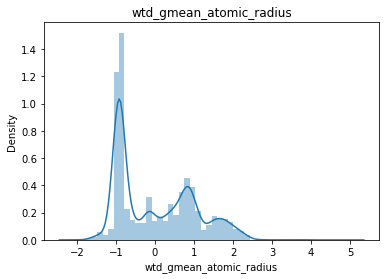

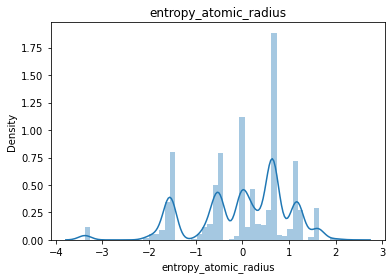

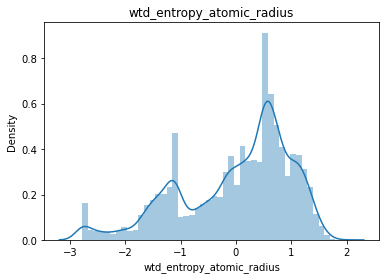

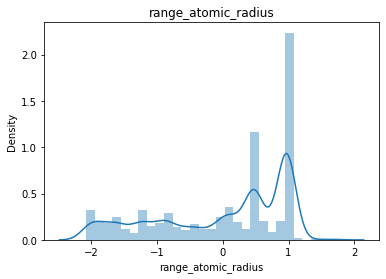

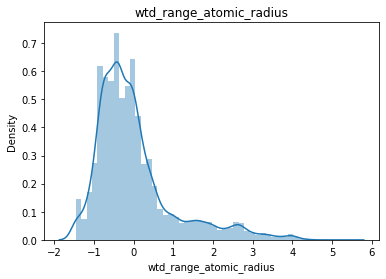

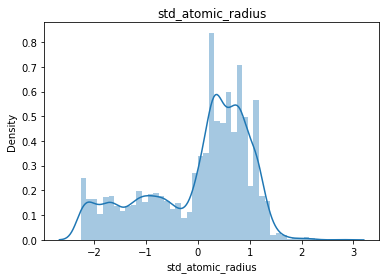

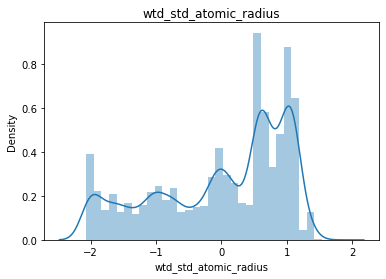

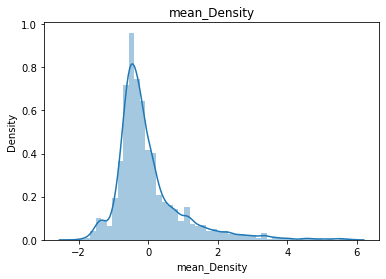

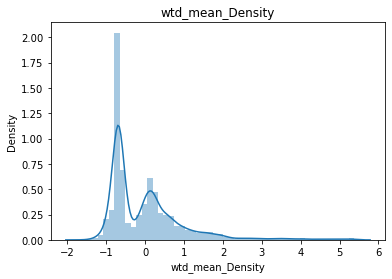

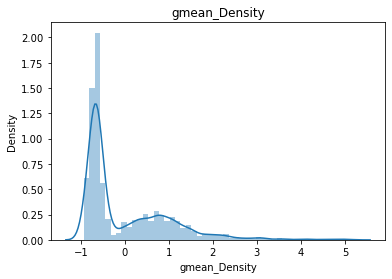

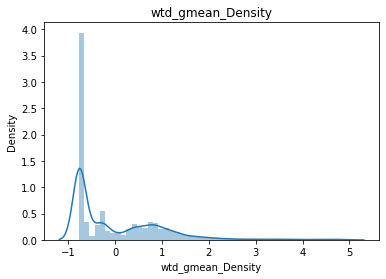

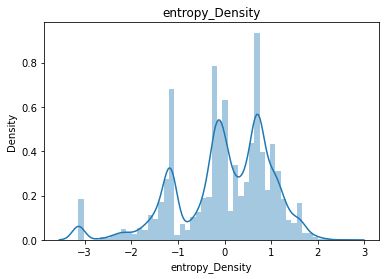

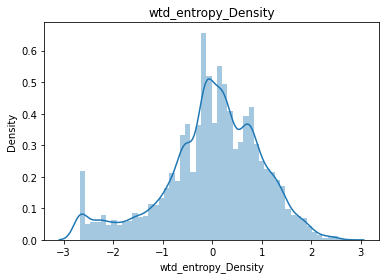

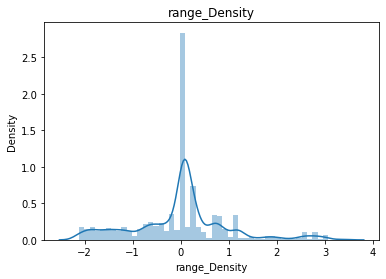

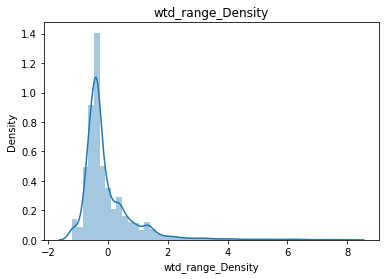

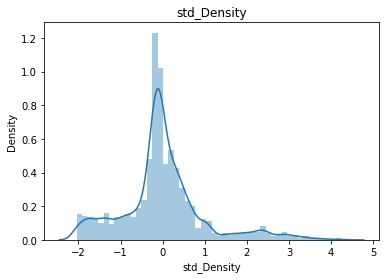

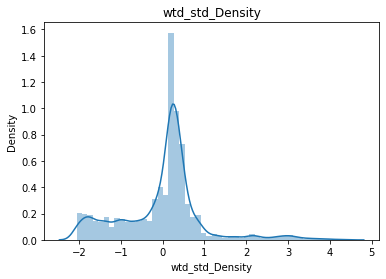

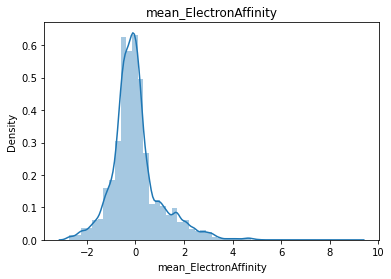

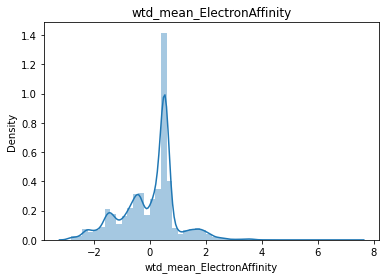

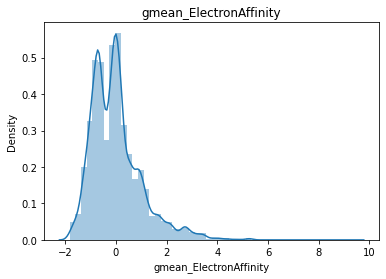

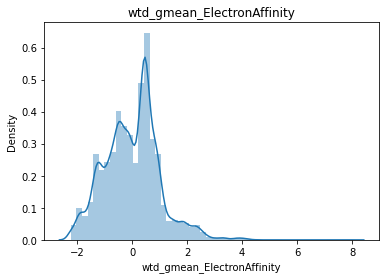

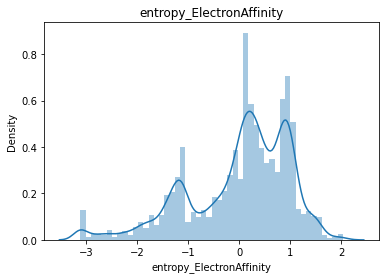

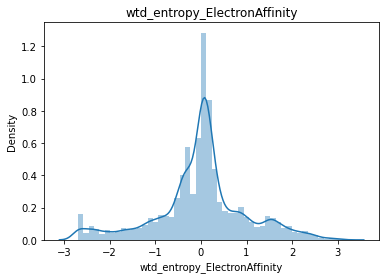

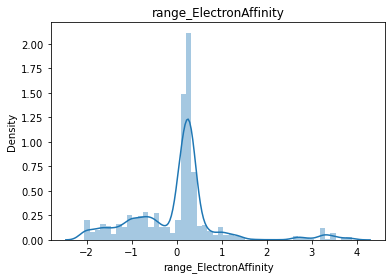

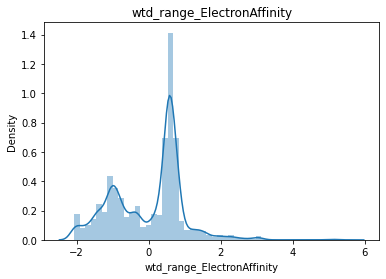

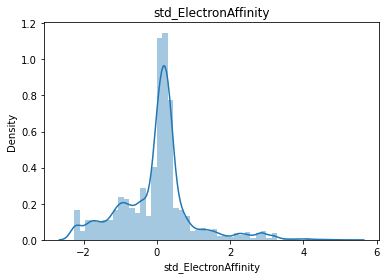

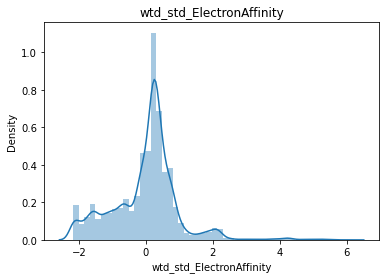

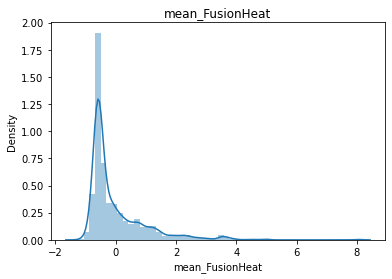

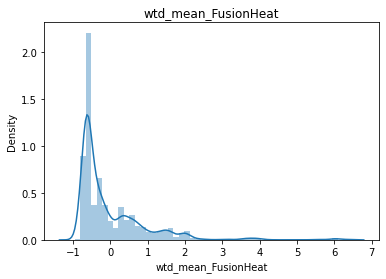

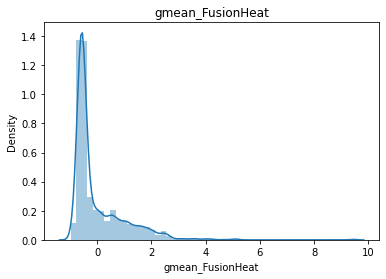

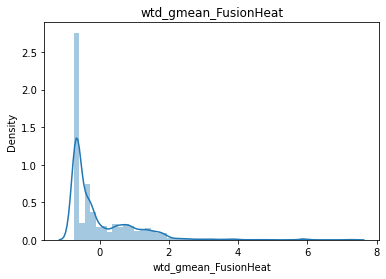

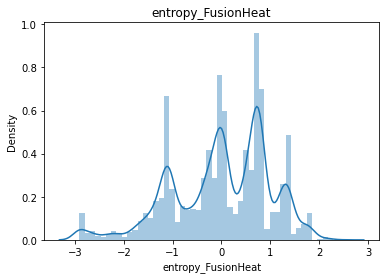

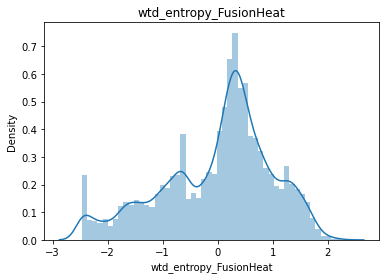

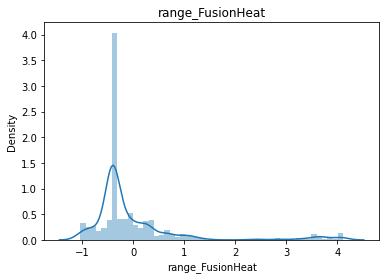

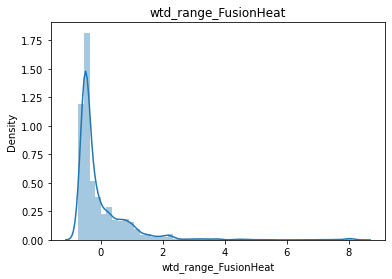

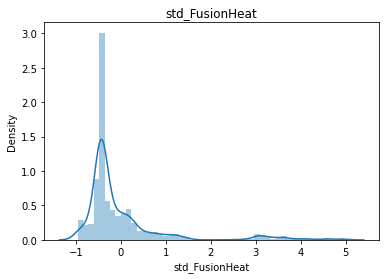

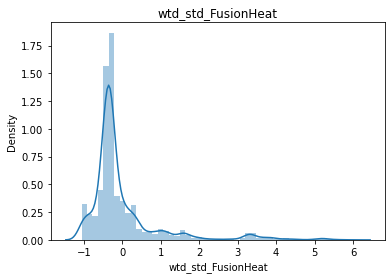

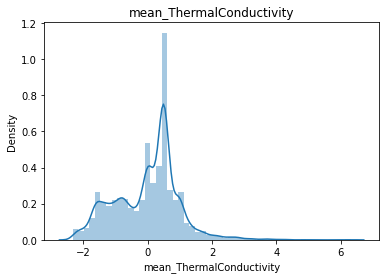

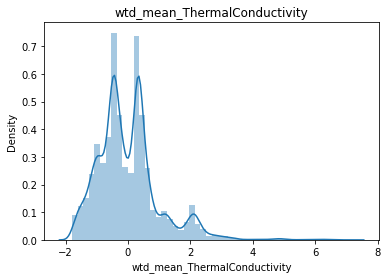

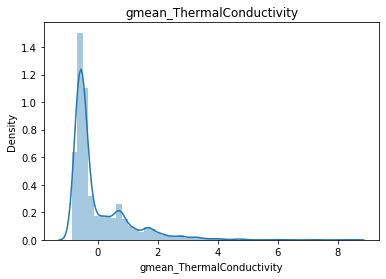

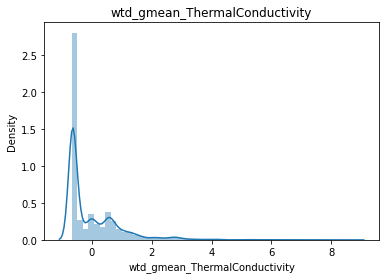

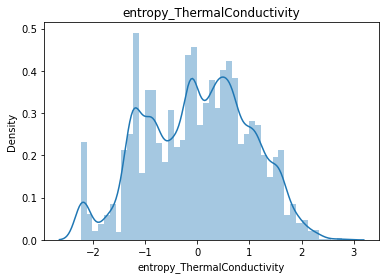

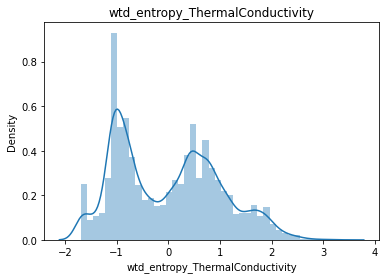

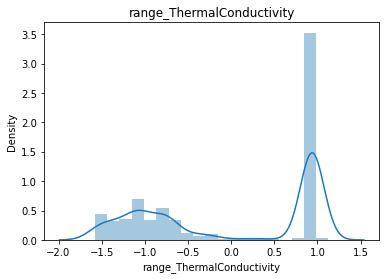

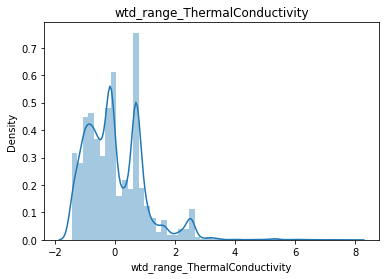

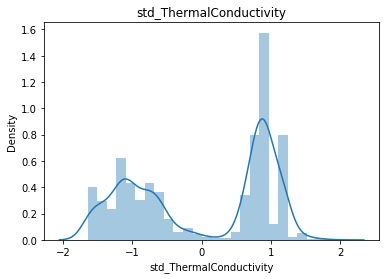

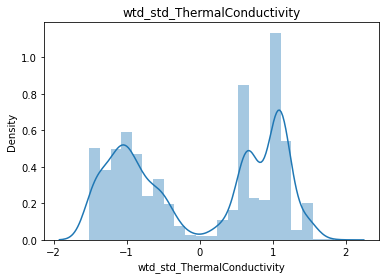

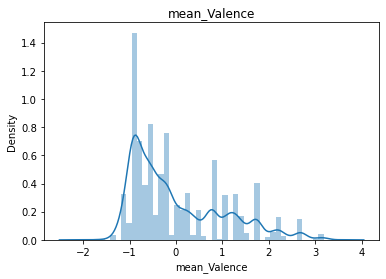

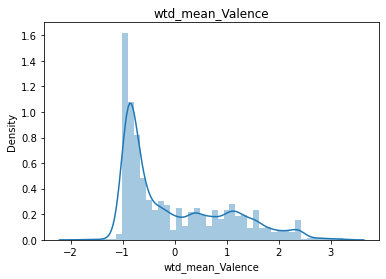

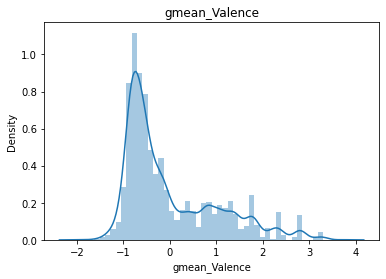

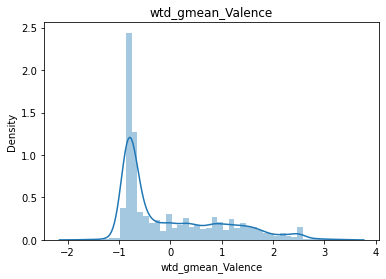

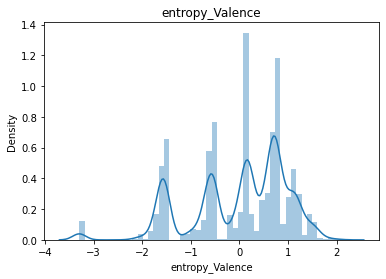

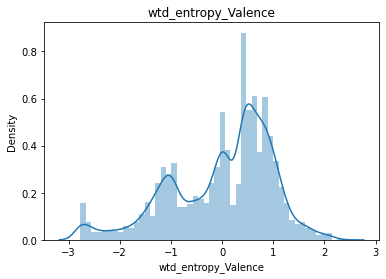

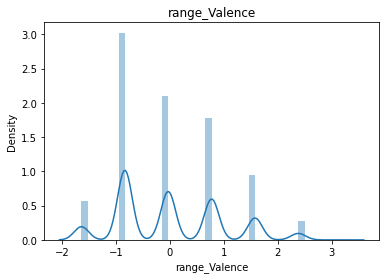

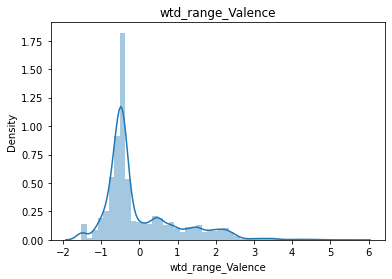

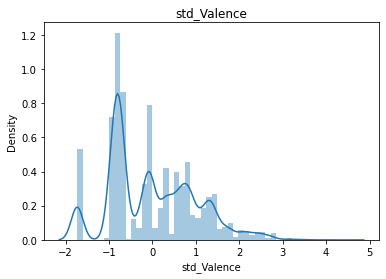

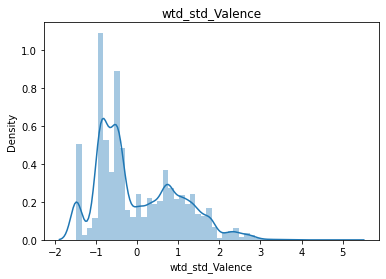

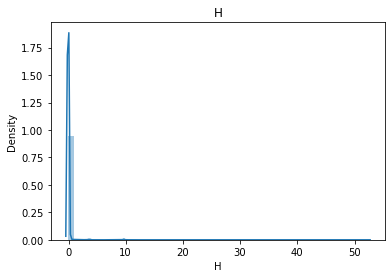

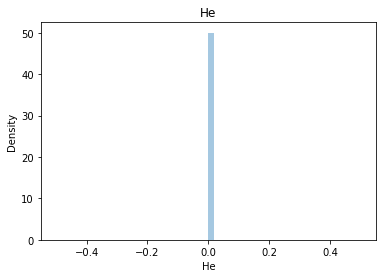

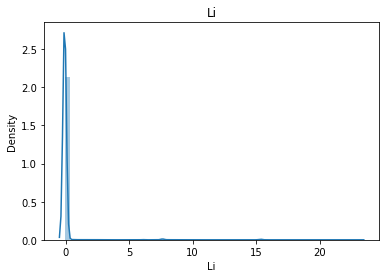

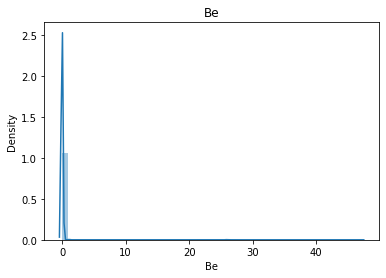

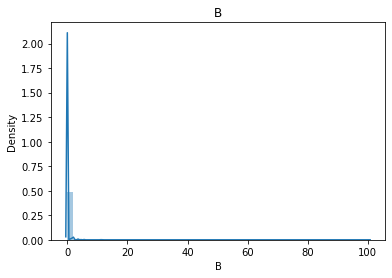

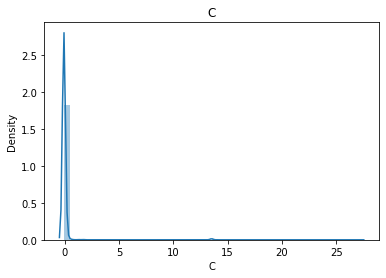

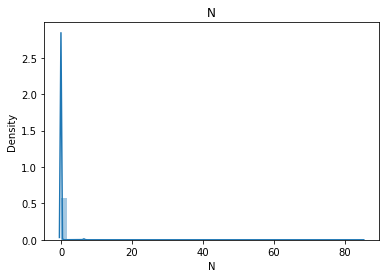

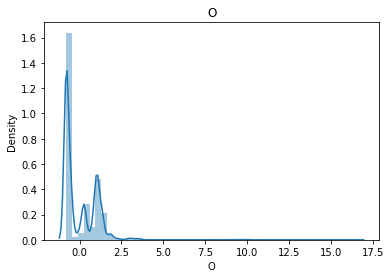

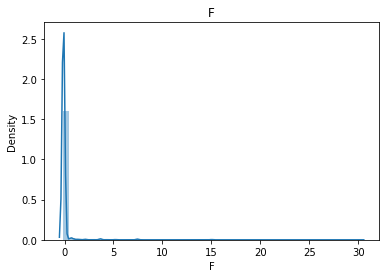

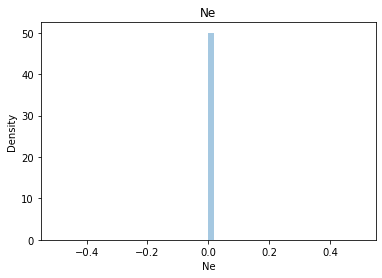

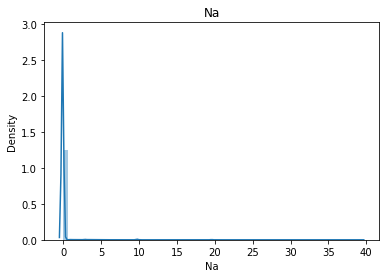

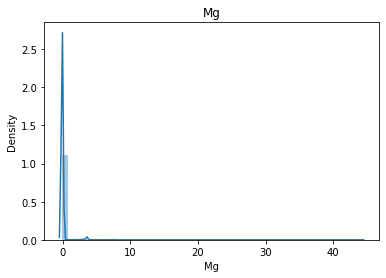

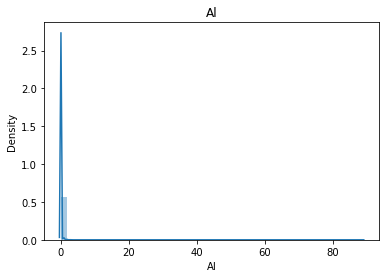

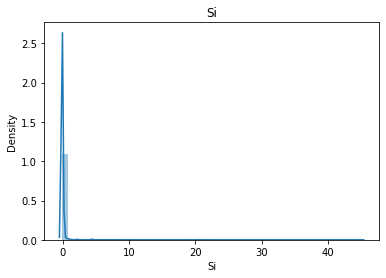

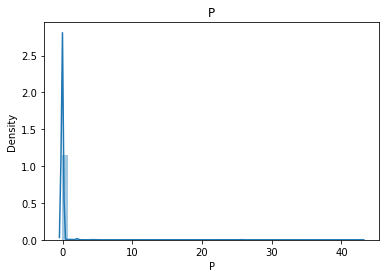

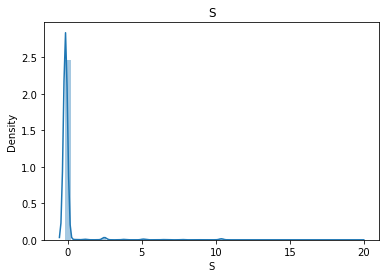

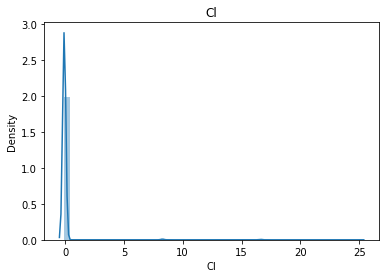

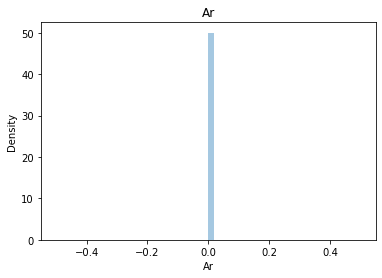

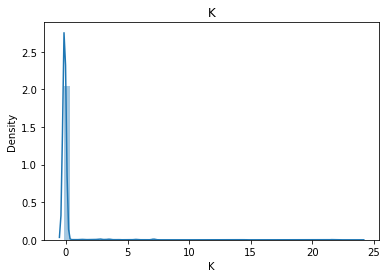

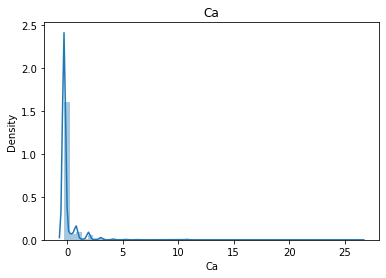

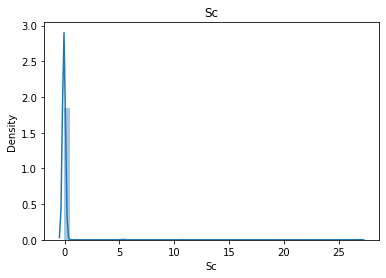

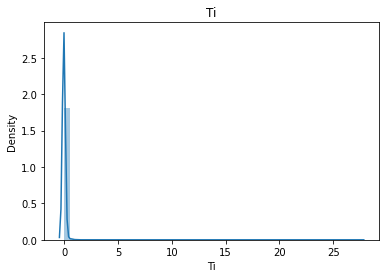

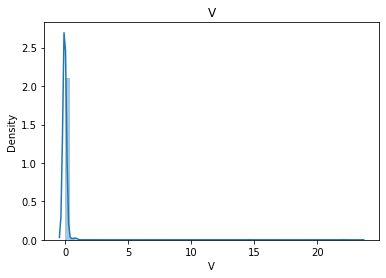

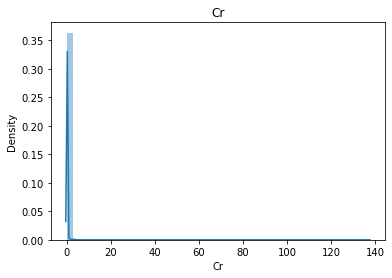

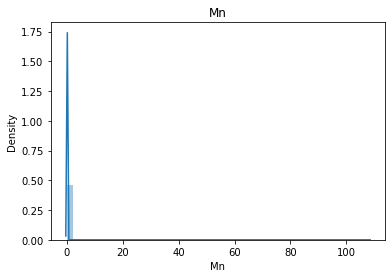

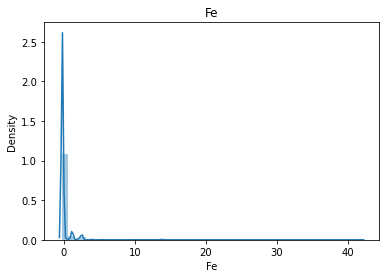

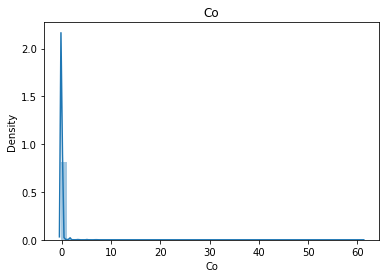

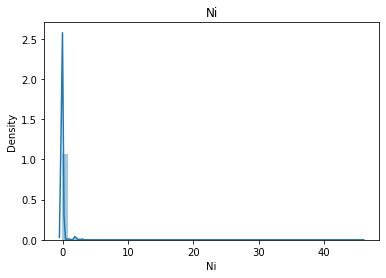

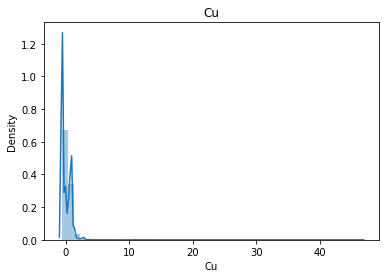

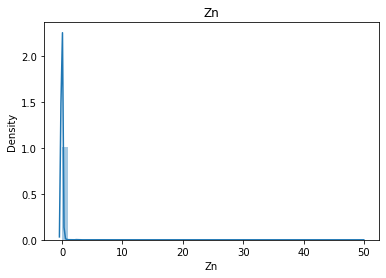

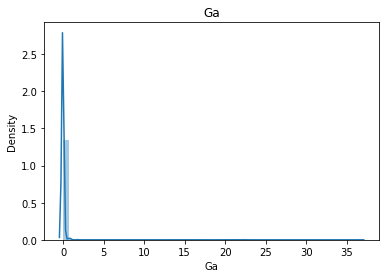

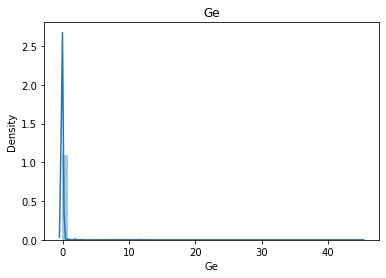

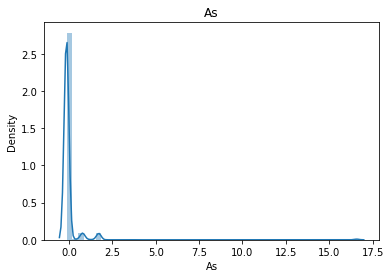

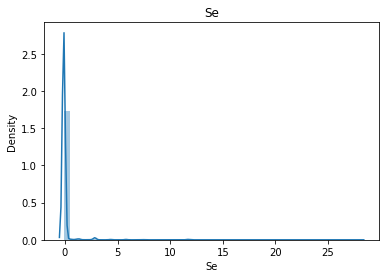

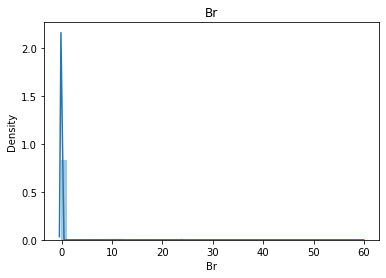

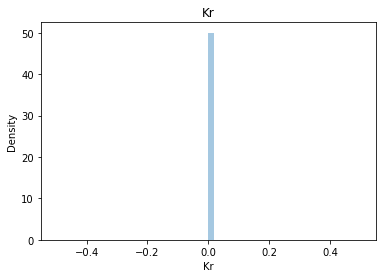

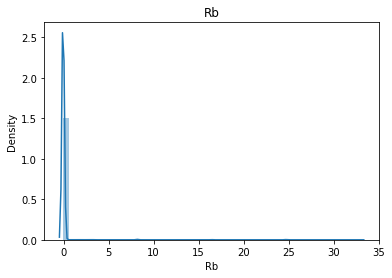

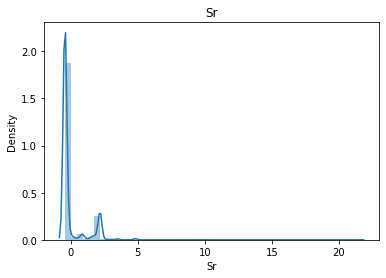

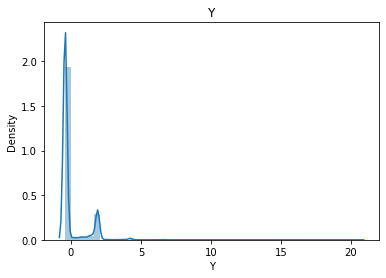

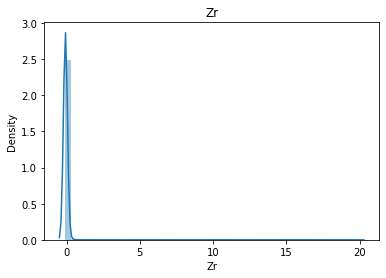

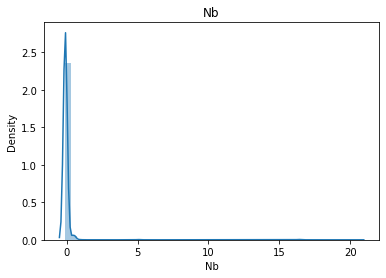

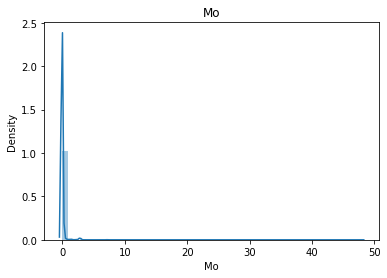

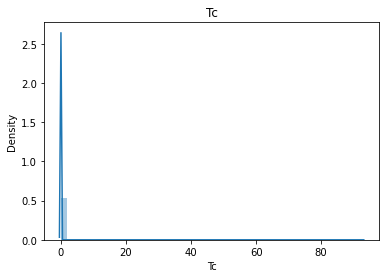

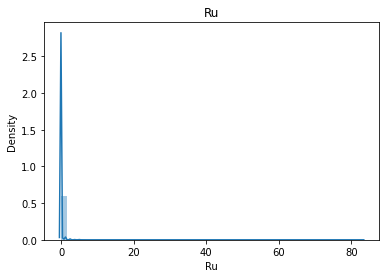

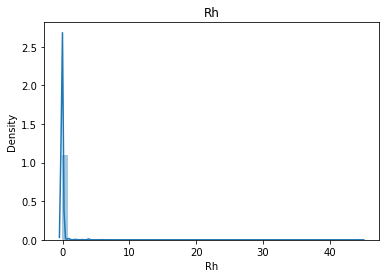

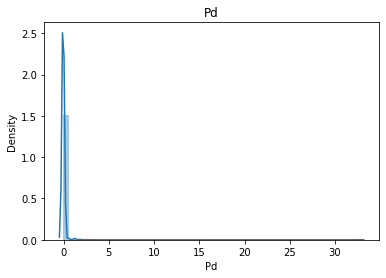

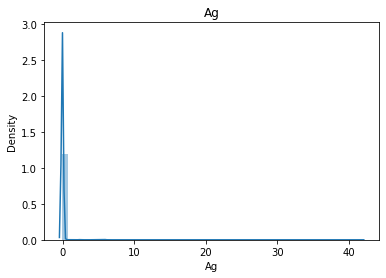

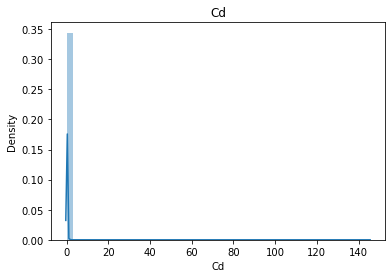

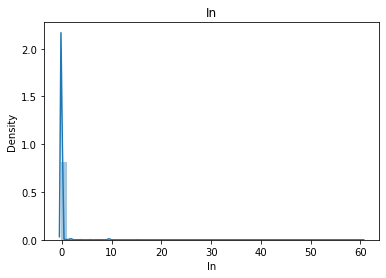

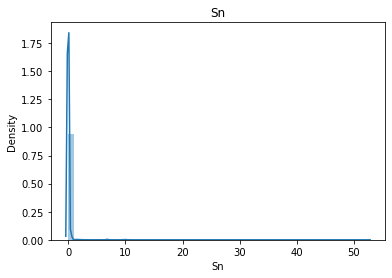

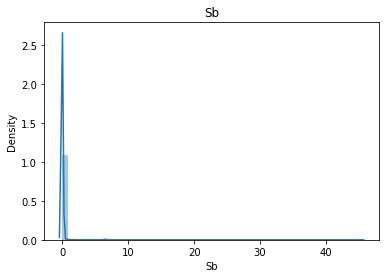

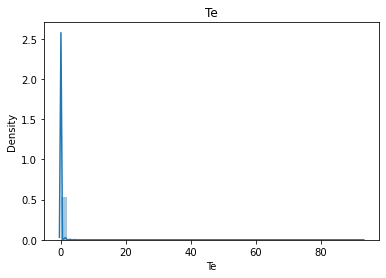

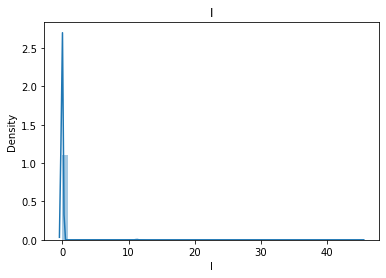

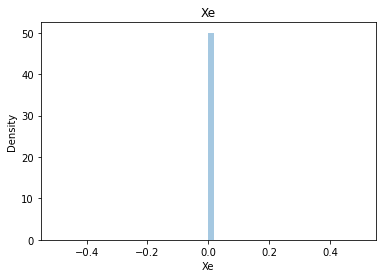

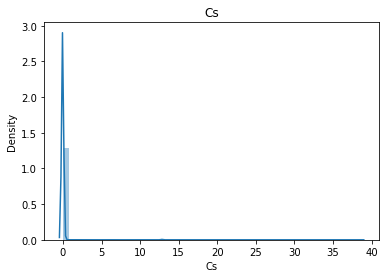

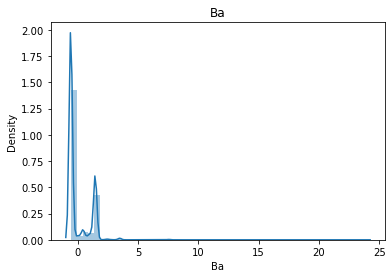

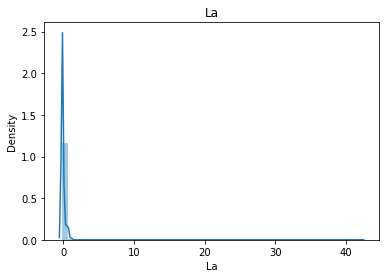

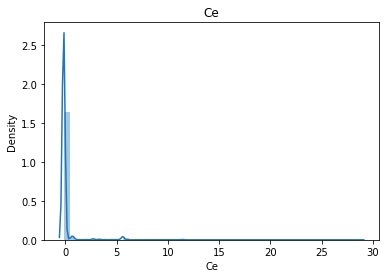

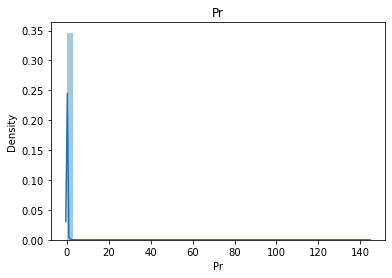

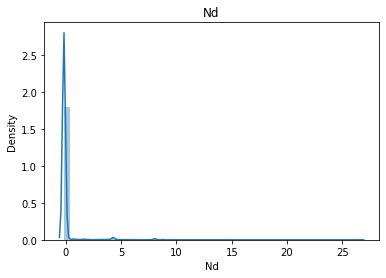

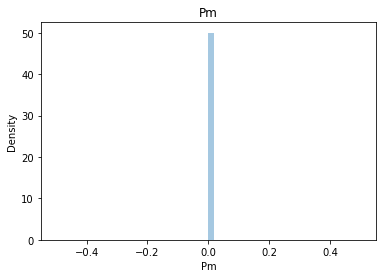

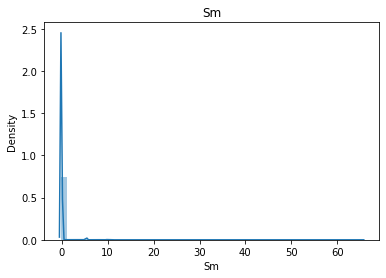

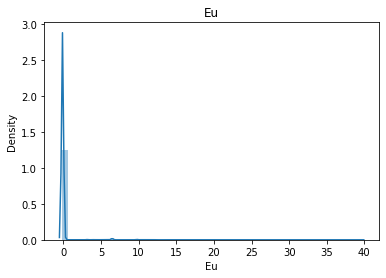

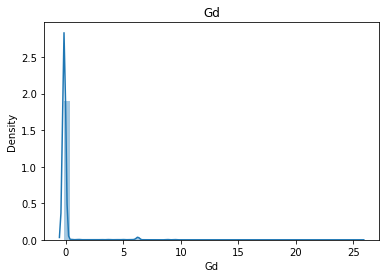

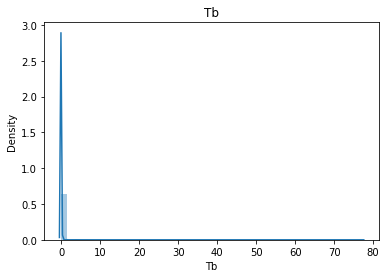

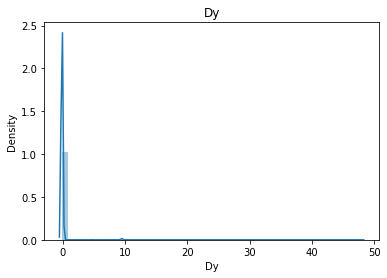

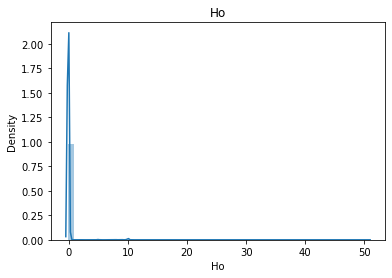

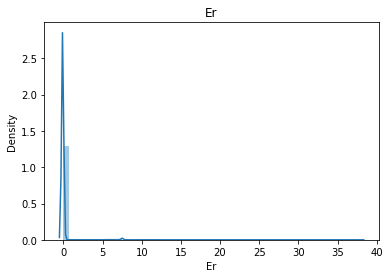

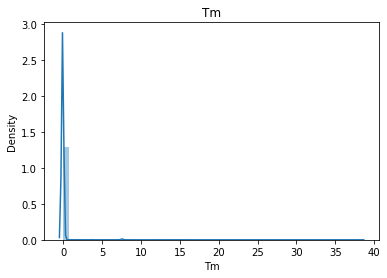

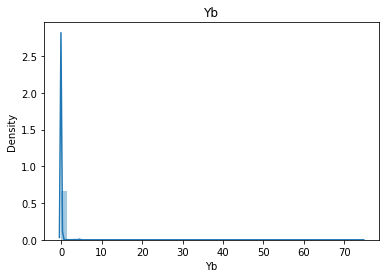

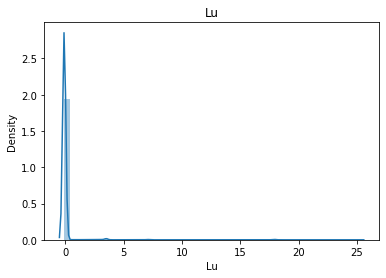

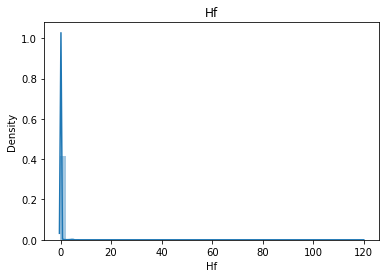

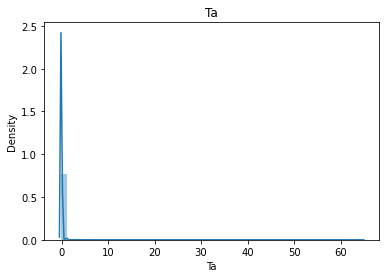

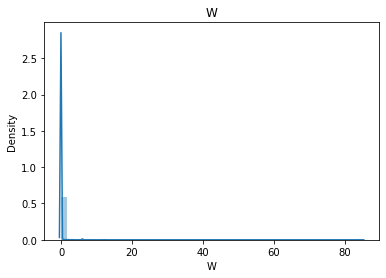

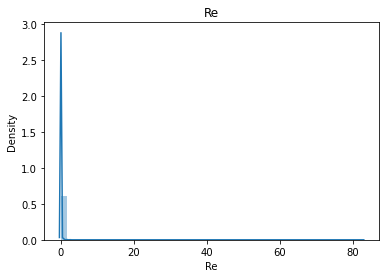

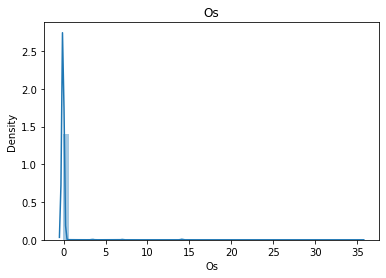

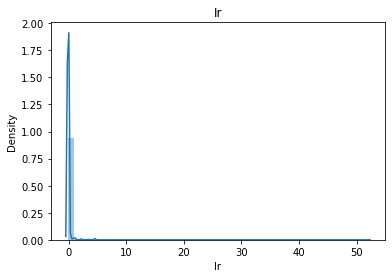

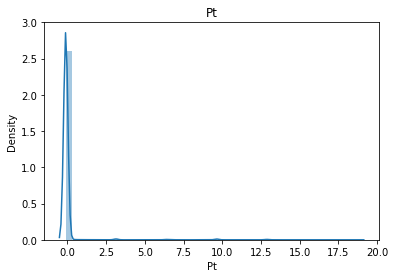

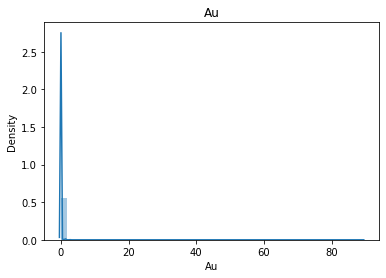

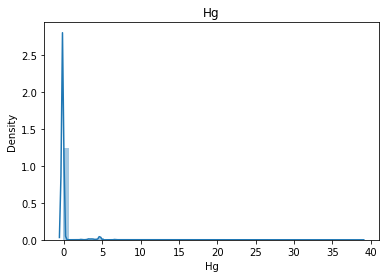

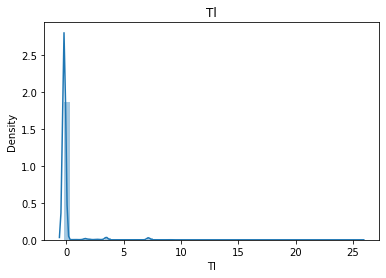

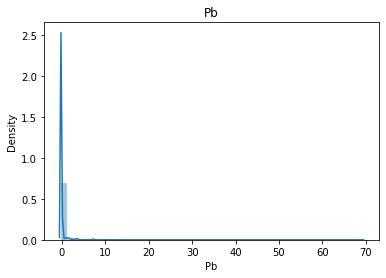

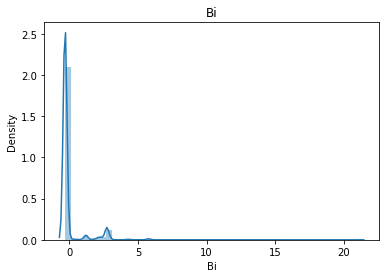

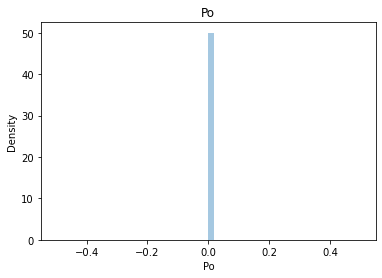

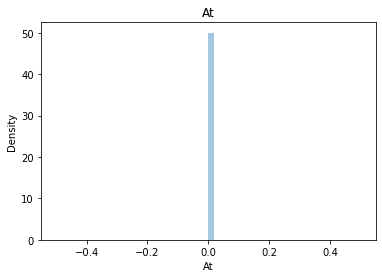

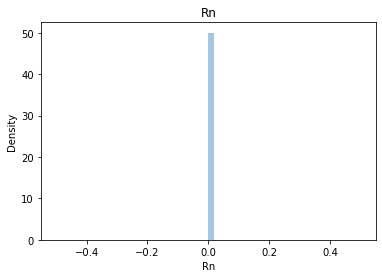

In [16]:
warnings.filterwarnings('ignore')

for i in x_scaled.columns:
    sns.distplot(x_scaled.loc[:,i]).set(title=i)
#     sns.title(i)
    plt.show()

<AxesSubplot:>

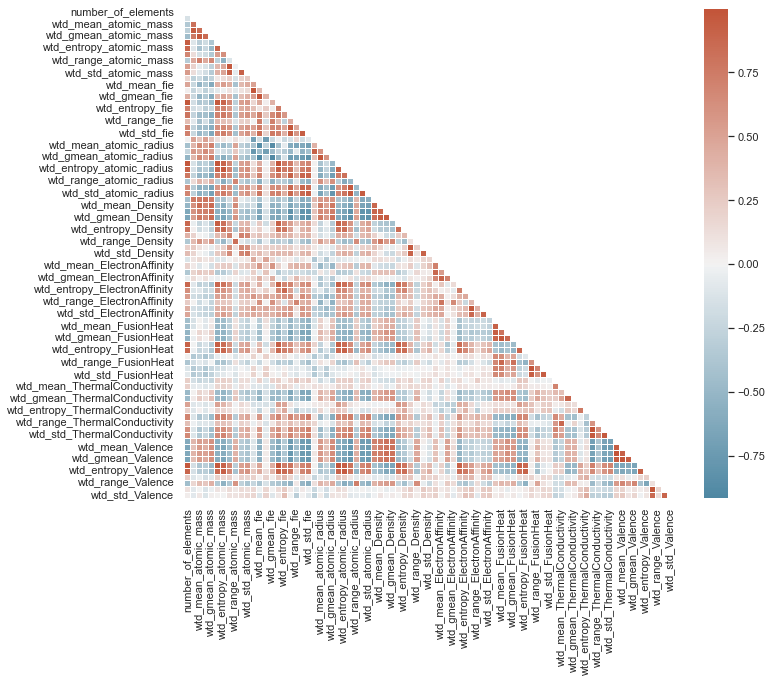

In [17]:
features = [x for x in list(x_scaled.columns) if x in list(data_1.columns)]
# features

sns.set_theme(style="white")
# Compute the correlation matrix
corr = x_scaled.loc[:,features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1})

#### Scaled

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

l1_reg = Lasso()
cv = KFold(shuffle=True, n_splits=5, random_state = 10)

### L1 & alpha

In [19]:
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-10,10,100)
coefs1 = []
best1 = -10000000000
best_alpha1 = 'error'

for a in alphas:
    l1_reg.alpha = a
    out = cross_val_score(l1_reg, xs_train, ys_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=10).mean()
    l1_reg.fit(xs_train, ys_train)
    coefs1.append(l1_reg.coef_)
    
    if(out > best1):
        best1 = out
        best_alpha1 = a

print('\tbest MSE\t\tbestalpha\n', best1, '\t', best_alpha1)

	best MSE		bestalpha
 -322.05508628257127 	 0.19630406500402683


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

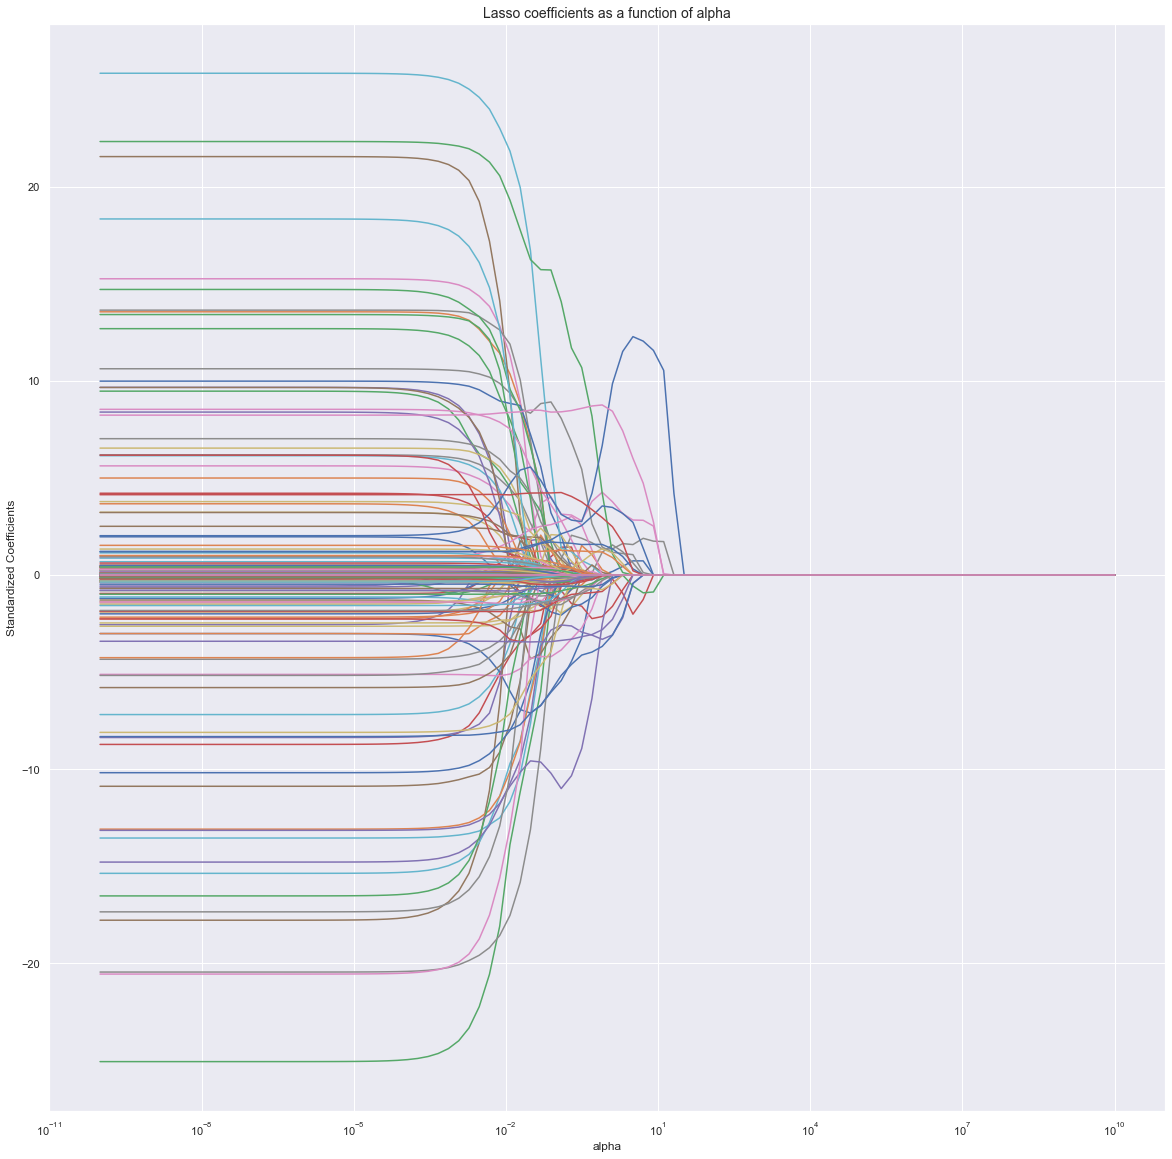

In [20]:
# L1 alphas convergence
ax = plt.gca()

ax.plot(alphas, coefs1)
ax.set_xscale('log')

plt.rcParams["figure.figsize"] = 8,4
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha', fontdict={'fontsize': 14})

### L2 & alpha

In [21]:
l2_reg = Ridge()
coefs2 = []
best2 = -10000000000
best_alpha2 = 'error'

for a in alphas:
    l2_reg.alpha = a
    out = cross_val_score(l2_reg, xs_train, ys_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=10).mean()
    l2_reg.fit(xs_train, ys_train)
    coefs2.append(l2_reg.coef_.flatten())
    
    if(out > best2):
        best2 = out
        best_alpha2 = a

print('\tbest MSE\t\tbestalpha\n', best2, '\t', best_alpha2)

	best MSE		bestalpha
 -321.2255795046314 	 1353.0477745798075


Text(0.5, 1.0, 'Ridge coefficients as a function of alpha')

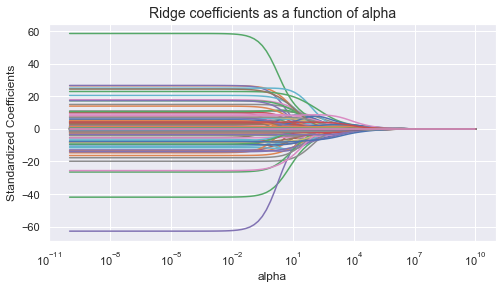

In [22]:
# L2 alpha convergence
ax = plt.gca()

ax.plot(alphas, coefs2)
ax.set_xscale('log')

plt.rcParams["figure.figsize"] = 8,5
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha', fontdict={'fontsize': 14})

In [82]:
### MODEL FITTING w/ BESTALPHA ###
lasso_model = Lasso(alpha=best_alpha1).fit(xs_train, ys_train)
ridge_model = Ridge(alpha=best_alpha2).fit(xs_train, ys_train)

In [83]:
print(abs(lasso_model.coef_))
# print("{:.6}".format(lasso_model.intercept_))

[0.00000000e+00 0.00000000e+00 2.08796284e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.09121718e+00 6.86237051e+00
 1.62770956e+00 0.00000000e+00 4.44802690e+00 0.00000000e+00
 0.00000000e+00 1.44234142e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00902846e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.05050689e+00
 1.52317276e-01 0.00000000e+00 2.39040136e-01 7.32168061e-01
 0.00000000e+00 1.46663900e+00 0.00000000e+00 1.69910384e+00
 0.00000000e+00 0.00000000e+00 1.24305728e+00 0.00000000e+00
 7.38976954e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.62227690e+00 0.00000000e+00 3.29279849e+00 0.00000000e+00
 5.37933188e-01 1.20423557e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.34298439e-01 0.00000000e+00
 1.81520552e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.66089091e+00 0.00000000e+00 1.16983883e+01 0.00000000e+00
 1.03375605e+01 3.355220

In [84]:
print(abs(ridge_model.coef_))

[[1.65798533e+00 1.15027469e+00 1.57132114e+00 5.12938197e-01
  1.46603614e-01 1.21182257e+00 3.20988371e+00 3.59562679e+00
  1.77250469e+00 1.73383267e+00 3.58627648e+00 5.95218459e-01
  1.84872304e-01 9.97478722e-01 3.28470275e-01 3.70872861e-01
  7.23497439e-01 1.25187289e+00 1.58778011e-01 9.98657362e-01
  6.89285056e-01 2.47716307e-01 2.14050232e+00 8.96695462e-01
  6.79279711e-01 1.27818741e-01 1.57747371e+00 2.14934333e+00
  1.40970464e+00 1.04536081e-01 1.80033229e+00 1.53274007e+00
  4.62705839e-01 1.80487609e+00 3.21351232e-02 1.69558750e+00
  1.35206508e+00 5.78533625e-02 1.76016225e+00 1.14769938e-01
  1.74419433e+00 1.00412947e+00 3.13077685e-01 5.54168734e-02
  3.11453266e+00 1.14551787e+00 3.29850502e+00 1.21995902e+00
  1.64597549e+00 1.82361958e+00 1.26905569e-01 6.84123324e-01
  2.18011641e-02 7.80835189e-02 4.95792286e-02 2.60273026e-01
  2.12209633e+00 7.93084772e-01 7.84416450e-01 2.58474290e-01
  1.79482934e+00 1.52367786e+00 5.47554195e+00 2.19977534e+00
  4.2334

In [101]:
imp_Xs_L1 = abs(lasso_model.coef_)
imp_Xs_L1 = (imp_Xs_L1 > 1).astype(int)
imp_Xs_L1 = imp_Xs_L1.astype(np.bool)
# print(imp_Xs)
imp_features = np.array(xs_train.columns)
print(np.count_nonzero(imp_features[imp_Xs_L1]))
print(imp_features[imp_Xs_L1])

28
['wtd_entropy_atomic_mass' 'range_atomic_mass' 'wtd_range_atomic_mass'
 'wtd_std_atomic_mass' 'gmean_fie' 'range_atomic_radius' 'gmean_Density'
 'entropy_Density' 'wtd_range_Density' 'wtd_gmean_ElectronAffinity'
 'wtd_entropy_ElectronAffinity' 'std_ElectronAffinity'
 'wtd_entropy_FusionHeat' 'wtd_std_FusionHeat'
 'wtd_mean_ThermalConductivity' 'wtd_gmean_ThermalConductivity'
 'wtd_entropy_ThermalConductivity' 'wtd_std_ThermalConductivity'
 'wtd_std_Valence' 'Si' 'S' 'Cl' 'Ca' 'Ag' 'Ba' 'Hg' 'Tl' 'Bi']


In [102]:
imp_Xs_L2 = abs(ridge_model.coef_.flatten())
imp_Xs_L2 = (imp_Xs_L2 > 1).astype(int)
imp_Xs_L2 = imp_Xs_L2.astype(np.bool)
# print(imp_Xs)
imp_features = np.array(xs_train.columns)
print(np.count_nonzero(imp_features[imp_Xs_L2]))
print(imp_features[imp_Xs_L2])

50
['number_of_elements' 'mean_atomic_mass' 'wtd_mean_atomic_mass'
 'entropy_atomic_mass' 'wtd_entropy_atomic_mass' 'range_atomic_mass'
 'wtd_range_atomic_mass' 'std_atomic_mass' 'wtd_std_atomic_mass'
 'range_fie' 'wtd_mean_atomic_radius' 'wtd_entropy_atomic_radius'
 'range_atomic_radius' 'wtd_range_atomic_radius' 'wtd_std_atomic_radius'
 'mean_Density' 'gmean_Density' 'entropy_Density' 'wtd_entropy_Density'
 'wtd_range_Density' 'wtd_std_Density' 'mean_ElectronAffinity'
 'wtd_gmean_ElectronAffinity' 'entropy_ElectronAffinity'
 'wtd_entropy_ElectronAffinity' 'range_ElectronAffinity'
 'wtd_range_ElectronAffinity' 'std_ElectronAffinity'
 'wtd_entropy_FusionHeat' 'wtd_std_FusionHeat' 'mean_ThermalConductivity'
 'wtd_mean_ThermalConductivity' 'gmean_ThermalConductivity'
 'wtd_gmean_ThermalConductivity' 'entropy_ThermalConductivity'
 'wtd_entropy_ThermalConductivity' 'wtd_std_ThermalConductivity'
 'range_Valence' 'wtd_range_Valence' 'wtd_std_Valence' 'Si' 'S' 'Cl' 'Ca'
 'As' 'Ag' 'Ba' 'Hg' '

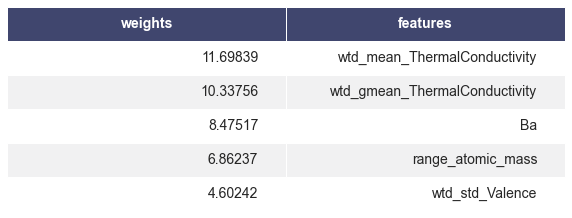

In [37]:
import six

feature_df = pd.DataFrame({'weights':abs(lasso_model.coef_),
                        'features':xs_train.columns})
top5 = feature_df.sort_values('weights', ascending=False).head(5)
top5 = top5.round({'weights':5})

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(top5, header_columns=0, col_width=5.0)
fig.savefig("table_mpl.png")

# credit to volodymyr: https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure

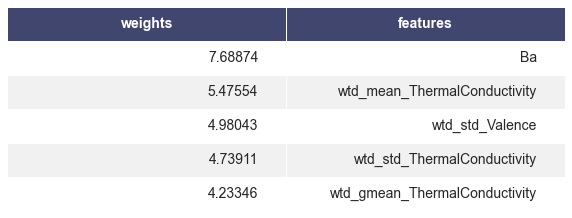

In [105]:
feature_df = pd.DataFrame({'weights':abs(ridge_model.coef_.flatten()),
                           'features':xs_train.columns})
top5 = feature_df.sort_values('weights', ascending=False).head(5)
top5 = top5.round({'weights':5})

fig,ax = render_mpl_table(top5, header_columns=0, col_width=5.0)
fig.show()

In [127]:
### MODEL FITTING w/ BESTALPHA ###
lasso_model = Lasso(alpha=best_alpha1).fit(xs_train, ys_train)
ridge_model = Ridge(alpha=best_alpha2).fit(xs_train, ys_train)

In [128]:
from sklearn.metrics import mean_squared_error

lm_stat = mean_squared_error(ys_test, lm.predict(xs_test))
lasso_stat = mean_squared_error(ys_test, lasso_model.predict(xs_test))
ridge_stat = mean_squared_error(ys_test, ridge_model.predict(xs_test))

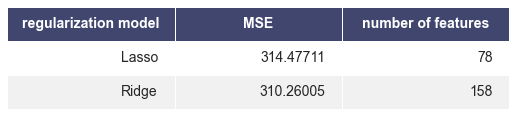

In [129]:
L1_features = abs(lasso_model.coef_)
L1_features = (L1_features > 0.000001).astype(int)
L1_features = L1_features.astype(np.bool)
np.count_nonzero(imp_features[imp_Xs_L1])

L2_features = abs(ridge_model.coef_.flatten())
L2_features = (L2_features > 0.000001).astype(int)
L2_features = L2_features.astype(np.bool)

model_metrics = pd.DataFrame({'regularization model':['Lasso','Ridge'],
                              'MSE':[lasso_stat,ridge_stat],
                              'number of features':[np.count_nonzero(imp_features[L1_features]),
                                                   np.count_nonzero(imp_features[L2_features])]})
# model_metrics
model_metrics = model_metrics.round({'MSE':5})
fig,ax = render_mpl_table(model_metrics, header_columns=0, col_width=3.0)
fig.savefig("metrics_tbl.png")

In [130]:
### MODEL FITTING w/ BESTALPHA ###
lasso_model = Lasso(alpha=best_alpha1).fit(xs_train[imp_features[imp_Xs_L1]], ys_train)
ridge_model = Ridge(alpha=best_alpha2).fit(xs_train[imp_features[imp_Xs_L2]], ys_train)

lasso_stat = mean_squared_error(ys_test, lasso_model.predict(xs_test[imp_features[imp_Xs_L1]]))
ridge_stat = mean_squared_error(ys_test, ridge_model.predict(xs_test[imp_features[imp_Xs_L2]]))

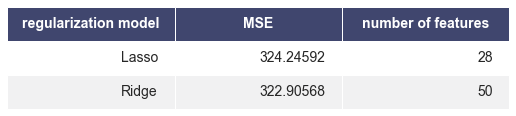

In [131]:
model_metrics = pd.DataFrame({'regularization model':['Lasso','Ridge'],
                              'MSE':[lasso_stat,ridge_stat],
                              'number of features':[np.count_nonzero(imp_features[imp_Xs_L1]),
                                                   np.count_nonzero(imp_features[imp_Xs_L2])]})
# model_metrics
model_metrics = model_metrics.round({'MSE':5})
fig,ax = render_mpl_table(model_metrics, header_columns=0, col_width=3.0)
fig.savefig("metrics_tbl_reduced.png")

In [71]:
### Correlation Check
corr['wtd_mean_ThermalConductivity']['wtd_gmean_ThermalConductivity']

0.49018743967117345

In [132]:
### Increase in MSE
print((324.24592-314.47711)/314.47711)

0.03106365992742693
